# Carbon Emissions Forecasting
# Final Submission - Daniel Rossetti

Start by importing all the libraries from the time series project

# Import Libraries

In [133]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pylab as plt
import seaborn as sns

#Importing library for date manipulation
from datetime import datetime

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#Import adfuller
from statsmodels.tsa.stattools import adfuller

#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

In [134]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.5 in c:\users\dan\anaconda3\lib\site-packages (from python-dateutil>=2.7.3->pandas>=0.19->pmdarima) (1.15.0)



In [135]:
from pmdarima.arima import auto_arima

# 1 - Reading Data and Initial Data Exploration

Read the data, analyze and organize the structure, and perform initial data processing

In [136]:
df = pd.read_excel('MER_T12_06 (1).xlsx')
df.head()

MSN  YYYYMM   Value                               Description
0  CLEIEUS  197301  72.076  Coal Electric Power Sector CO2 Emissions
1  CLEIEUS  197302  64.442  Coal Electric Power Sector CO2 Emissions
2  CLEIEUS  197303  64.084  Coal Electric Power Sector CO2 Emissions
3  CLEIEUS  197304  60.842  Coal Electric Power Sector CO2 Emissions
4  CLEIEUS  197305  61.798  Coal Electric Power Sector CO2 Emissions

Even though the focus is on natural gas (NNEIEUS) it's important to see what else exists in the dataset.  Getting a full list of the MSNs with their corresponding descriptions sheds light on the rest of the data.

In [137]:
df.groupby(['MSN','Description']).count()

YYYYMM  Value
MSN     Description                                                      
CLEIEUS Coal Electric Power Sector CO2 Emissions               566    566
DKEIEUS Distillate Fuel, Including Kerosene-Type Jet Fu...     566    566
GEEIEUS Geothermal Energy Electric Power Sector CO2 Emi...     566    566
NNEIEUS Natural Gas Electric Power Sector CO2 Emissions        566    566
NWEIEUS Non-Biomass Waste Electric Power Sector CO2 Emi...     566    566
PAEIEUS Petroleum Electric Power Sector CO2 Emissions          566    566
PCEIEUS Petroleum Coke Electric Power Sector CO2 Emissions     566    566
RFEIEUS Residual Fuel Oil Electric Power Sector CO2 Emi...     566    566
TXEIEUS Total Energy Electric Power Sector CO2 Emissions       566    566

The last group above is the "total energy...emissions."  It may be useful to use this information to get "big picture" information that may help analyze the natural gas emissions data.  On the other hand, it may not, but it's easy enough to look.  First, it should be determined if the "total" emissions for a random date are in fact equal to the sum of all the others.

In [138]:
#Create a "test" dataframe for a random date to efficiently sum the emssions and compare to the "total" value.
# *This is not to be confused with the train and test datasets that will be made later
test = df[df.YYYYMM == 200101]
print(test.head(9))
test.Value[0:8].sum()

          MSN  YYYYMM    Value  \
364   CLEIEUS  200101  171.379   
930   NNEIEUS  200101   18.459   
1496  DKEIEUS  200101    3.387   
2062  PCEIEUS  200101    0.912   
2628  RFEIEUS  200101   10.662   
3194  PAEIEUS  200101    14.96   
3760  GEEIEUS  200101     0.03   
4326  NWEIEUS  200101    0.925   
4892  TXEIEUS  200101  205.754   

                                            Description  
364            Coal Electric Power Sector CO2 Emissions  
930     Natural Gas Electric Power Sector CO2 Emissions  
1496  Distillate Fuel, Including Kerosene-Type Jet F...  
2062  Petroleum Coke Electric Power Sector CO2 Emiss...  
2628  Residual Fuel Oil Electric Power Sector CO2 Em...  
3194      Petroleum Electric Power Sector CO2 Emissions  
3760  Geothermal Energy Electric Power Sector CO2 Em...  
4326  Non-Biomass Waste Electric Power Sector CO2 Em...  
4892   Total Energy Electric Power Sector CO2 Emissions  


220.71400000000003

It can be seen that the "total" emissions are a bit off from the calculated total.  This can be investigated further if there is time and a possible benefit.

At this point, the natural gas data must be filtered out by it's corresponding MSN and analyzed.

## 1.1 Extract NNEIEUS Data

In [139]:
#Filter out the NNEIEUS data for Natural Gas emissions
data = df[df.MSN == "NNEIEUS"]
data.head(27)

MSN  YYYYMM    Value                                      Description
566  NNEIEUS  197301   12.175  Natural Gas Electric Power Sector CO2 Emissions
567  NNEIEUS  197302   11.708  Natural Gas Electric Power Sector CO2 Emissions
568  NNEIEUS  197303   13.994  Natural Gas Electric Power Sector CO2 Emissions
569  NNEIEUS  197304   14.627  Natural Gas Electric Power Sector CO2 Emissions
570  NNEIEUS  197305   17.344  Natural Gas Electric Power Sector CO2 Emissions
571  NNEIEUS  197306   20.265  Natural Gas Electric Power Sector CO2 Emissions
572  NNEIEUS  197307   23.067  Natural Gas Electric Power Sector CO2 Emissions
573  NNEIEUS  197308    22.85  Natural Gas Electric Power Sector CO2 Emissions
574  NNEIEUS  197309   19.297  Natural Gas Electric Power Sector CO2 Emissions
575  NNEIEUS  197310   17.897  Natural Gas Electric Power Sector CO2 Emissions
576  NNEIEUS  197311   13.766  Natural Gas Electric Power Sector CO2 Emissions
577  NNEIEUS  197312   11.866  Natural Gas Electric Power Sector CO2 Emissions
578  NNEIEUS  197313  198.857  Natural Gas Electric Power Sector CO2 Emissions
579  NNEIEUS  197401   11.959  Natural Gas Electric Power Sector CO2 Emissions
580  NNEIEUS  197402   11.021  Natural Gas Electric Power Sector CO2 Emissions
581  NNEIEUS  197403    13.86  Natural Gas Electric Power Sector CO2 Emissions
582  NNEIEUS  197404   14.105  Natural Gas Electric Power Sector CO2 Emissions
583  NNEIEUS  197405   16.676  Natural Gas Electric Power Sector CO2 Emissions
584  NNEIEUS  197406   18.859  Natural Gas Electric Power Sector CO2 Emissions
585  NNEIEUS  197407   21.984  Natural Gas Electric Power Sector CO2 Emissions
586  NNEIEUS  197408   20.748  Natural Gas Electric Power Sector CO2 Emissions
587  NNEIEUS  197409   17.027  Natural Gas Electric Power Sector CO2 Emissions
588  NNEIEUS  197410   16.236  Natural Gas Electric Power Sector CO2 Emissions
589  NNEIEUS  197411   12.999  Natural Gas Electric Power Sector CO2 Emissions
590  NNEIEUS  197412   11.244  Natural Gas Electric Power Sector CO2 Emissions
591  NNEIEUS  197413  186.716  Natural Gas Electric Power Sector CO2 Emissions
592  NNEIEUS  197501   11.165  Natural Gas Electric Power Sector CO2 Emissions

In [140]:
#data info to determine data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 566 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSN          566 non-null    object
 1   YYYYMM       566 non-null    int64 
 2   Value        566 non-null    object
 3   Description  566 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.1+ KB


The date values should be converted to the datetime format so that an initial plot will look correct.  Given that the MSN and description values are identical for every point in this series, we can drop these columns from the dataset.

## 1.2 - Drop Columns, Correct Data Formats, and Clean the Data

In [141]:
#Drop the description of the data, and the MSN
data.drop('MSN', axis=1, inplace=True)
data.drop('Description', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 566 to 1131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YYYYMM  566 non-null    int64 
 1   Value   566 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.3+ KB


In [142]:
#Covert "value" column to int64 data type
data.Value = pd.to_numeric(data['Value'], 'raise', 'float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 566 to 1131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  566 non-null    int64  
 1   Value   566 non-null    float32
dtypes: float32(1), int64(1)
memory usage: 11.1 KB


In [143]:
#Create Date-Time Column
data['Date']=pd.to_datetime(data['YYYYMM'], yearfirst=True, format ='%Y%m', errors='coerce')
data.Date

#Drop 'YYYYMM" column' now that a proper datetime format column has been created
data.drop('YYYYMM', axis=1, inplace=True)

#Show dataframe to check format for 2 years (24 months)
data.head(24)

Value       Date
566   12.175000 1973-01-01
567   11.708000 1973-02-01
568   13.994000 1973-03-01
569   14.627000 1973-04-01
570   17.344000 1973-05-01
571   20.264999 1973-06-01
572   23.066999 1973-07-01
573   22.850000 1973-08-01
574   19.297001 1973-09-01
575   17.896999 1973-10-01
576   13.766000 1973-11-01
577   11.866000 1973-12-01
578  198.856995        NaT
579   11.959000 1974-01-01
580   11.021000 1974-02-01
581   13.860000 1974-03-01
582   14.105000 1974-04-01
583   16.676001 1974-05-01
584   18.858999 1974-06-01
585   21.983999 1974-07-01
586   20.747999 1974-08-01
587   17.027000 1974-09-01
588   16.236000 1974-10-01
589   12.999000 1974-11-01

Note the "NaT" value in the dataset.  Working backward, it can be seen that this corresponds to a date code with the last two month "MM" digits as 13.  As there is no 13th month, the format cannot be changed accordingly for these data points.  It can also be noticed that the emissions value is a full order of magnitude higher, and it appears that this may actually be a yearly emissions total.  This can be proven mathematically, and if this is correct, this data can be removed for now, though it may have a use later.

In [144]:
#Check to see if the 13th month is actually a yearly total
print(data.Value[0:12].sum())
print(data.iloc[12,:])

198.856
Value    198.857
Date         NaT
Name: 578, dtype: object


This confirms the proposed theory, and these data points can be removed since they provide redundant information.

In [145]:
data.dropna(inplace=True)
data.info()
data.tail(25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 566 to 1131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Value   523 non-null    float32       
 1   Date    523 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float32(1)
memory usage: 10.2 KB


Value       Date
1105  45.901001 2014-07-01
1106  48.870998 2014-08-01
1107  41.960999 2014-09-01
1108  38.285999 2014-10-01
1109  32.702999 2014-11-01
1110  34.799999 2014-12-01
1112  39.154999 2015-01-01
1113  35.667999 2015-02-01
1114  38.872002 2015-03-01
1115  36.610001 2015-04-01
1116  40.439999 2015-05-01
1117  48.919998 2015-06-01
1118  57.712002 2015-07-01
1119  56.661999 2015-08-01
1120  49.383999 2015-09-01
1121  43.680000 2015-10-01
1122  40.394001 2015-11-01
1123  42.270000 2015-12-01
1125  42.566002 2016-01-01
1126  37.917999 2016-02-01
1127  40.525002 2016-03-01
1128  39.763000 2016-04-01
1129  44.209999 2016-05-01
1130  53.567001 2016-06-01
1131  62.881001 2016-07-01

Plot the data to visualize the trends and behavior.

## 1.3 - Set Date as Index and Create Initial Data Plot

In [146]:
#First, the date column should be set as the index
data = data.set_index(['Date'])
data.head(12)

Value
Date                 
1973-01-01  12.175000
1973-02-01  11.708000
1973-03-01  13.994000
1973-04-01  14.627000
1973-05-01  17.344000
1973-06-01  20.264999
1973-07-01  23.066999
1973-08-01  22.850000
1973-09-01  19.297001
1973-10-01  17.896999
1973-11-01  13.766000
1973-12-01  11.866000

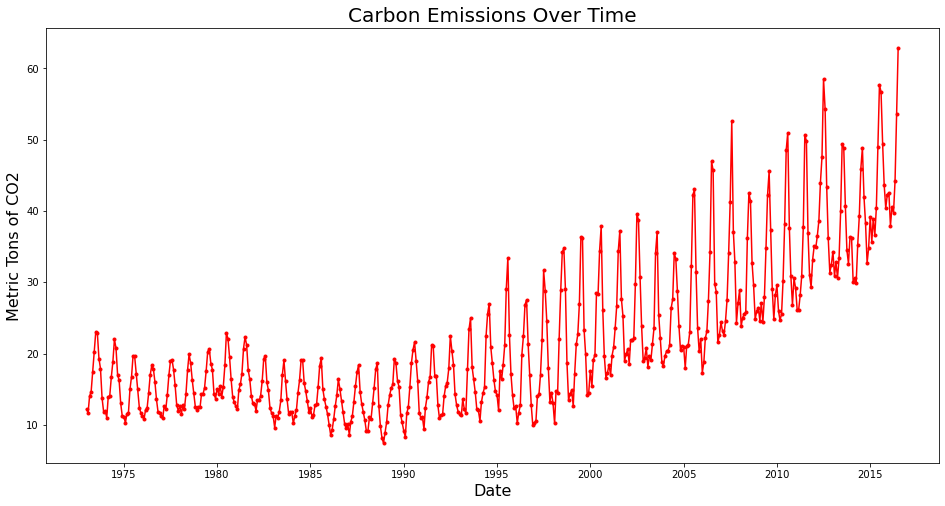

In [147]:
plt.figure(figsize=(16,8))
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Metric Tons of CO2", fontsize = 16)
plt.title('Carbon Emissions Over Time', fontsize = 20)
plt.plot(data.index, data.Value, color = 'r', marker='.')

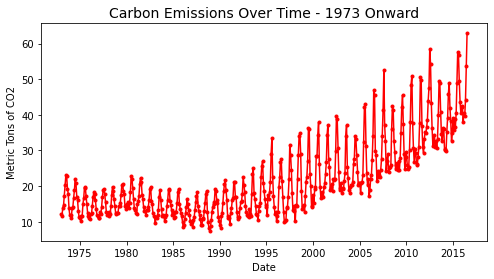

In [149]:
#Formatting for PORTFOLIO
plt.figure(figsize=(8,4)).patch.set_facecolor('white')
plt.xlabel("Date", fontsize = 10)
plt.ylabel("Metric Tons of CO2", fontsize = 10)
plt.title('Carbon Emissions Over Time - 1973 Onward', fontsize = 14)
plt.plot(data.index, data.Value, color = 'r', marker='.')

## <center>Observations:
* Overall, an upward trend can be observed with strong seasonality in the most literal sense as the data is taken monthly and the repetitive fluctuations are a direct function of the changing seasons.
* It can also be seen that this upward trend begins around 1990 and prior to that, natural gas use for electric energy waivered.
* From this its apparent that data prior to 1990 has little to do with the current data, and that perhaps some event or influencing factor caused the current trend to commence.

### As a result of this, only data after 1990 will be used to build models and make predictions.

### Smaller datasets run more efficiently.

### 1.3.1 - Select Data After 1990 as it contains the most relevant data related to the current trend.

In [150]:
#Filter out the NNEIEUS data for Natural Gas emissions
data = data[data.index > "1989-12-01"]
data.head(27)

Value
Date                 
1990-01-01   9.182000
1990-02-01   8.295000
1990-03-01  11.590000
1990-04-01  12.530000
1990-05-01  15.351000
1990-06-01  18.698000
1990-07-01  20.507000
1990-08-01  21.590000
1990-09-01  18.936001
1990-10-01  16.165001
1990-11-01  11.632000
1990-12-01  11.017000
1991-01-01  11.135000
1991-02-01   9.406000
1991-03-01  12.394000
1991-04-01  13.853000
1991-05-01  16.014999
1991-06-01  16.708000
1991-07-01  21.173000
1991-08-01  21.028000
1991-09-01  16.879000
1991-10-01  16.907000
1991-11-01  12.719000
1991-12-01  10.925000
1992-01-01  11.401000
1992-02-01  11.481000
1992-03-01  13.993000

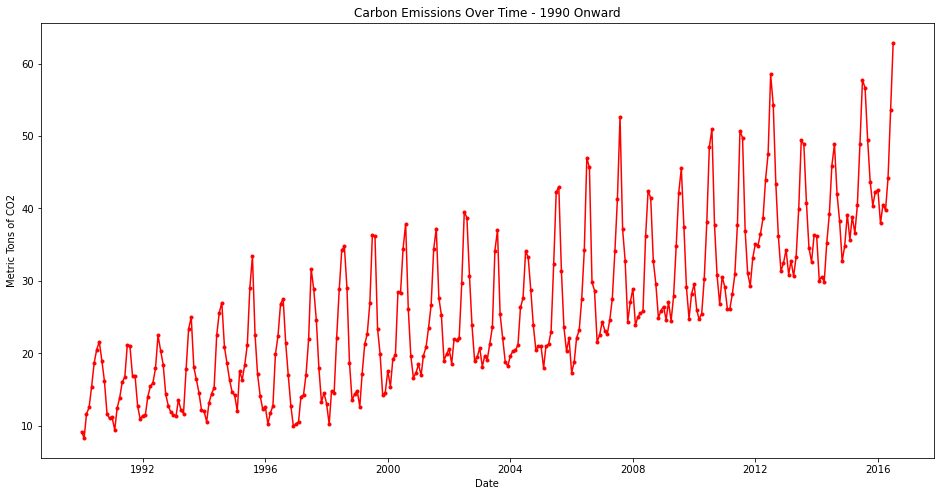

In [151]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Carbon Emissions Over Time - 1990 Onward')
plt.plot(data.index, data.Value, color = 'r', marker='.')

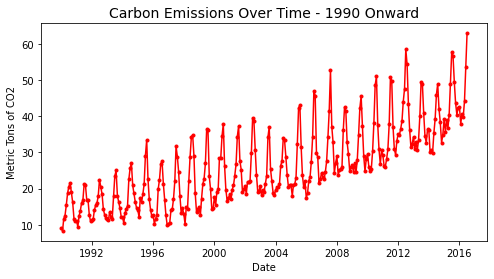

In [153]:
#Formatting for PORTFOLIO
plt.figure(figsize=(8,4)).patch.set_facecolor('white')
plt.xlabel("Date", fontsize = 10)
plt.ylabel("Metric Tons of CO2", fontsize = 10)
plt.title('Carbon Emissions Over Time - 1990 Onward', fontsize = 14)
plt.plot(data.index, data.Value, color = 'r', marker='.')

## 1.4 - Explore Other Emissions Data from the Original Dataset

In [19]:
df.groupby(['MSN','Description']).count()

YYYYMM  Value
MSN     Description                                                      
CLEIEUS Coal Electric Power Sector CO2 Emissions               566    566
DKEIEUS Distillate Fuel, Including Kerosene-Type Jet Fu...     566    566
GEEIEUS Geothermal Energy Electric Power Sector CO2 Emi...     566    566
NNEIEUS Natural Gas Electric Power Sector CO2 Emissions        566    566
NWEIEUS Non-Biomass Waste Electric Power Sector CO2 Emi...     566    566
PAEIEUS Petroleum Electric Power Sector CO2 Emissions          566    566
PCEIEUS Petroleum Coke Electric Power Sector CO2 Emissions     566    566
RFEIEUS Residual Fuel Oil Electric Power Sector CO2 Emi...     566    566
TXEIEUS Total Energy Electric Power Sector CO2 Emissions       566    566

In [20]:
#Create new exploration dataframe to prevent errors
dfnew = df.copy()


#Drop the descirption column
dfnew.drop('Description', axis=1, inplace=True)

#Covert all YYYYMM values to datetime format
dfnew['Date']=pd.to_datetime(dfnew['YYYYMM'], yearfirst=True, format ='%Y%m', errors='coerce')
dfnew.Date

#Drop 'YYYYMM" column' now that a proper datetime format column has been created
dfnew.drop('YYYYMM', axis=1, inplace=True)

#Remove 13th month data
dfnew.dropna(inplace=True)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 5093
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   MSN     4707 non-null   object        
 1   Value   4707 non-null   object        
 2   Date    4707 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 147.1+ KB


In [21]:
#See if all dates are provided for all data.  This is suggested by each fuel source having the dame datacount, but it's
# easy to check the each data is represented the same number of times to confirm that th edate ranges are identical
dfnew.groupby(['Date']).count().describe()

MSN  Value
count  523.0  523.0
mean     9.0    9.0
std      0.0    0.0
min      9.0    9.0
25%      9.0    9.0
50%      9.0    9.0
75%      9.0    9.0
max      9.0    9.0

In [22]:
#Given that the minimum and maximum vlaueas are identical, each date appears 9 times, and all date ranges are the same.

#Create Dataframe where each fuel type is a column
CLEIEUS = []
CLEIEUS = dfnew[dfnew.MSN == "CLEIEUS"]
CLEIEUS = CLEIEUS.set_index(['Date'])
CLEIEUS.drop('MSN', axis=1, inplace=True)
CLEIEUS.columns = ['CLEIEUS']
CLEIEUS = pd.DataFrame(CLEIEUS)
print(CLEIEUS)

DKEIEUS = []
DKEIEUS = dfnew[dfnew.MSN == "DKEIEUS"]
DKEIEUS = DKEIEUS.set_index(['Date'])
DKEIEUS.drop('MSN', axis=1, inplace=True)
DKEIEUS.columns = ['DKEIEUS']
DKEIEUS = pd.DataFrame(DKEIEUS)
print(DKEIEUS)


GEEIEUS = []
GEEIEUS = dfnew[dfnew.MSN == "GEEIEUS"]
GEEIEUS = GEEIEUS.set_index(['Date'])
GEEIEUS.drop('MSN', axis=1, inplace=True)
GEEIEUS.columns = ['GEEIEUS']
GEEIEUS = pd.DataFrame(GEEIEUS)
print(GEEIEUS)


NNEIEUS = []
NNEIEUS = dfnew[dfnew.MSN == "NNEIEUS"]
NNEIEUS = NNEIEUS.set_index(['Date'])
NNEIEUS.drop('MSN', axis=1, inplace=True)
NNEIEUS.columns = ['NNEIEUS']
NNEIEUS = pd.DataFrame(NNEIEUS)
print(NNEIEUS)

NWEIEUS = []
NWEIEUS = dfnew[dfnew.MSN == "NWEIEUS"]
NWEIEUS = NWEIEUS.set_index(['Date'])
NWEIEUS.drop('MSN', axis=1, inplace=True)
NWEIEUS.columns = ['NWEIEUS']
NWEIEUS = pd.DataFrame(NWEIEUS)
print(NWEIEUS)

PAEIEUS = []
PAEIEUS = dfnew[dfnew.MSN == "PAEIEUS"]
PAEIEUS = PAEIEUS.set_index(['Date'])
PAEIEUS.drop('MSN', axis=1, inplace=True)
PAEIEUS.columns = ['PAEIEUS']
PAEIEUS = pd.DataFrame(PAEIEUS)
print(PAEIEUS)

PCEIEUS = []
PCEIEUS = dfnew[dfnew.MSN == "PCEIEUS"]
PCEIEUS = PCEIEUS.set_index(['Date'])
PCEIEUS.drop('MSN', axis=1, inplace=True)
PCEIEUS.columns = ['PCEIEUS']
PCEIEUS = pd.DataFrame(PCEIEUS)
print(PCEIEUS)

RFEIEUS = []
RFEIEUS = dfnew[dfnew.MSN == "RFEIEUS"]
RFEIEUS = RFEIEUS.set_index(['Date'])
RFEIEUS.drop('MSN', axis=1, inplace=True)
RFEIEUS.columns = ['RFEIEUS']
RFEIEUS = pd.DataFrame(RFEIEUS)
print(RFEIEUS)

TXEIEUS = []
TXEIEUS = dfnew[dfnew.MSN == "TXEIEUS"]
TXEIEUS = TXEIEUS.set_index(['Date'])
TXEIEUS.drop('MSN', axis=1, inplace=True)
TXEIEUS.columns = ['TXEIEUS']
TXEIEUS = pd.DataFrame(TXEIEUS)
print(TXEIEUS)

            CLEIEUS
Date               
1973-01-01   72.076
1973-02-01   64.442
1973-03-01   64.084
1973-04-01   60.842
1973-05-01   61.798
...             ...
2016-03-01    72.84
2016-04-01    71.41
2016-05-01    82.51
2016-06-01  115.772
2016-07-01  135.958

[523 rows x 1 columns]
           DKEIEUS
Date              
1973-01-01   2.375
1973-02-01   2.061
1973-03-01   1.171
1973-04-01   1.022
1973-05-01   0.949
...            ...
2016-03-01   0.279
2016-04-01   0.259
2016-05-01    0.34
2016-06-01   0.293
2016-07-01   0.342

[523 rows x 1 columns]
                  GEEIEUS
Date                     
1973-01-01  Not Available
1973-02-01  Not Available
1973-03-01  Not Available
1973-04-01  Not Available
1973-05-01  Not Available
...                   ...
2016-03-01          0.035
2016-04-01          0.034
2016-05-01          0.035
2016-06-01          0.034
2016-07-01          0.035

[523 rows x 1 columns]
           NNEIEUS
Date              
1973-01-01  12.175
1973-02-01  11.708
1973-03

In [23]:
#two of the datarames have "Not Available" Data which should be removed before converting the remaining numerical values
# from object data to mnumerical data.  (GEEIEUS, and NWEIEUS)

GEEIEUS = GEEIEUS[GEEIEUS.GEEIEUS != "Not Available"]
NWEIEUS = NWEIEUS[NWEIEUS.NWEIEUS != "Not Available"]

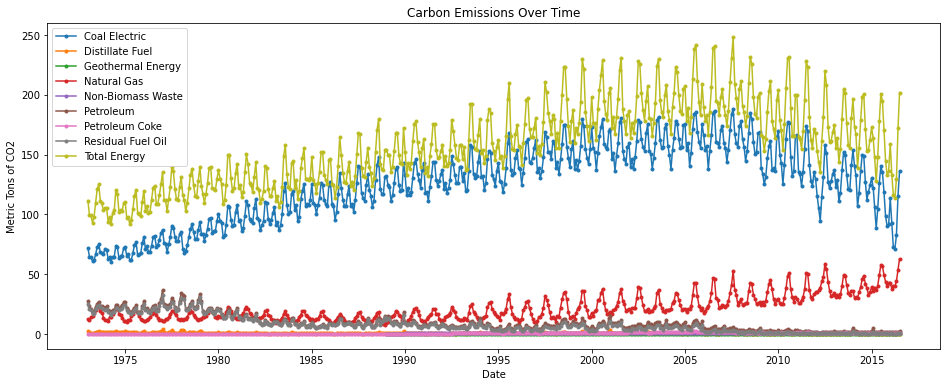

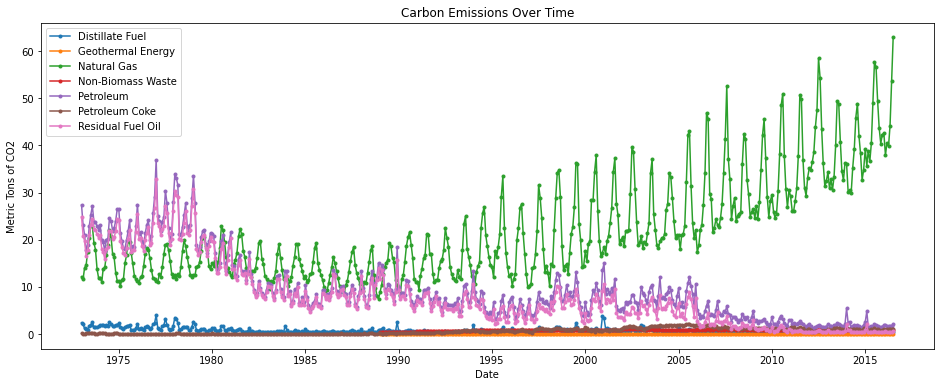

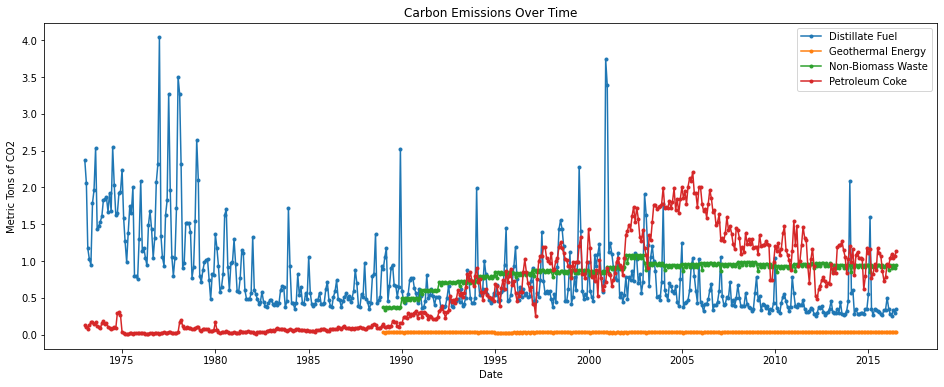

In [24]:
plt.figure(figsize=(16,6))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Carbon Emissions Over Time')
plt.plot(CLEIEUS, marker='.', label = 'Coal Electric')
plt.plot(DKEIEUS, marker='.', label = 'Distillate Fuel')
plt.plot(GEEIEUS, marker='.', label = 'Geothermal Energy')
plt.plot(NNEIEUS, marker='.', label = 'Natural Gas')
plt.plot(NWEIEUS, marker='.', label = 'Non-Biomass Waste')
plt.plot(PAEIEUS, marker='.', label = 'Petroleum')
plt.plot(PCEIEUS, marker='.', label = 'Petroleum Coke')
plt.plot(RFEIEUS, marker='.', label = 'Residual Fuel Oil')
plt.plot(TXEIEUS, marker='.', label = 'Total Energy')

plt.legend()
plt.show()  


plt.figure(figsize=(16,6))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Carbon Emissions Over Time')
plt.plot(DKEIEUS, marker='.', label = 'Distillate Fuel')
plt.plot(GEEIEUS, marker='.', label = 'Geothermal Energy')
plt.plot(NNEIEUS, marker='.', label = 'Natural Gas')
plt.plot(NWEIEUS, marker='.', label = 'Non-Biomass Waste')
plt.plot(PAEIEUS, marker='.', label = 'Petroleum')
plt.plot(PCEIEUS, marker='.', label = 'Petroleum Coke')
plt.plot(RFEIEUS, marker='.', label = 'Residual Fuel Oil')

plt.legend()
plt.show()  


plt.figure(figsize=(16,6))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Carbon Emissions Over Time')
plt.plot(DKEIEUS, marker='.', label = 'Distillate Fuel')
plt.plot(GEEIEUS, marker='.', label = 'Geothermal Energy')
#plt.plot(NNEIEUS, marker='.', label = 'Natural Gas')
plt.plot(NWEIEUS, marker='.', label = 'Non-Biomass Waste')
#plt.plot(PAEIEUS, marker='.', label = 'Petroleum')
plt.plot(PCEIEUS, marker='.', label = 'Petroleum Coke')
#plt.plot(RFEIEUS, marker='.', label = 'Residual Fuel Oil')

plt.legend()
plt.show()  

In [25]:
NNEIEUS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 1973-01-01 to 2016-07-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NNEIEUS  523 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


## <center> Observations
* All energy sources are plotted, and the largest energy sources are removed with each successive plot so that the trends of energy sources with orders of magnitude lower emissions can be observed.
* It can be seen that Coal Emissions make up the largest majority of electric energy emissions in the US, with our source of interest (Natural Gas) being the second most polluting.
* If we ignore differences in the carbon emissions per unit mass of fuel, the contributions of each energy source make sense in that the more accessible fuels are polluting the most.  For example, natural gas is relatively plentiful, but sources like distillate fuel require may require special refinement or are the by-products of other energy sources.  Further, non-biomass waste and Geothermal energy are low due to how uncommon they are, and in the case of geothermal, the fact that pollutants are minimal.
* With respect to the problem at hand which is focused around natural gas emissions, these other fuel sources will not be considered further in this program.

# 2 - Create Rolling Averages, Examine Stationarity, & Create Stationarity

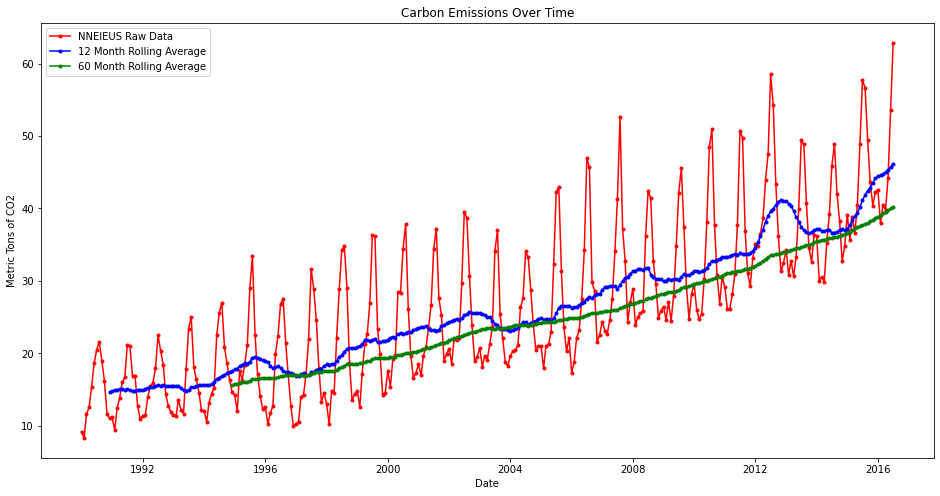

In [26]:
#Take a rolling average an examine the results

rlav12 = data.rolling(window=12).mean()
rlav60 = data.rolling(window=60).mean()
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Carbon Emissions Over Time')
NNEIEUS = plt.plot(data, color = 'r', marker='.', label = 'NNEIEUS Raw Data')
Rolling_Average12 = plt.plot(rlav12, color = 'b', marker='.', label = '12 Month Rolling Average')
Rolling_Average60 = plt.plot(rlav60, color = 'g', marker='.', label = '60 Month Rolling Average')
plt.legend()
plt.show()

In [27]:
#Using an Augmented Dickey-Fuller (ADF) test to determine stationarity here is not necessary because the data are clearly not
# stationary.  However, for a numerical comparison, it will be performed anyway.

adftest = adfuller(data['Value'])
adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
for key,value in adftest[4].items():
 adfoutput['Critical Value (%s)'%key] = value
print(adfoutput)

Test Statistic            0.733131
p-value                   0.990476
Lags Used                15.000000
No. of Observations     303.000000
Critical Value (1%)      -3.452118
Critical Value (5%)      -2.871127
Critical Value (10%)     -2.571878
dtype: float64


With a p value of 0.998, the ADF test has confirmed the visual observation.  The data are NOT stationary.

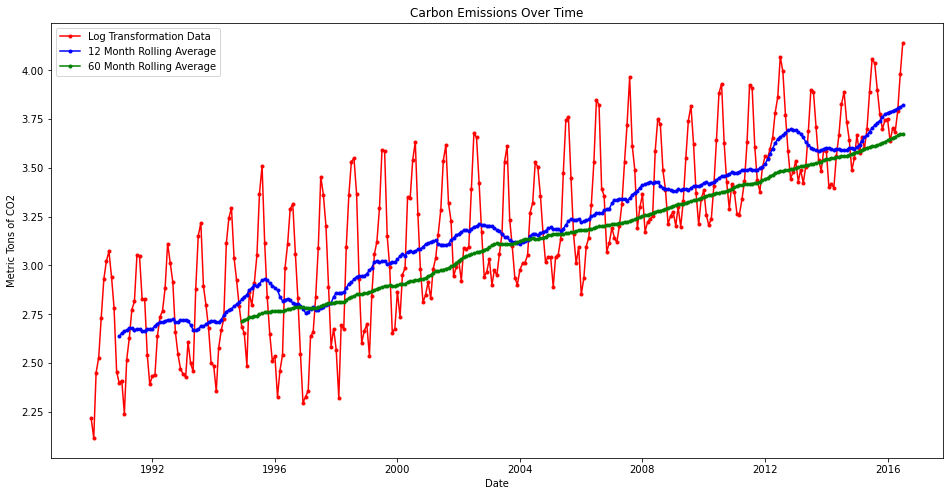

In [28]:
logdata = np.log(data)

plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Carbon Emissions Over Time')
Log_data = plt.plot(logdata, color = 'r', marker='.', label = 'Log Transformation Data')

Rolling_Average12 = plt.plot(logdata.rolling(window=12).mean(), color = 'b', marker='.', label = '12 Month Rolling Average')
Rolling_Average60 = plt.plot(logdata.rolling(window=60).mean(), color = 'g', marker='.', label = '60 Month Rolling Average')
plt.legend()
plt.show()

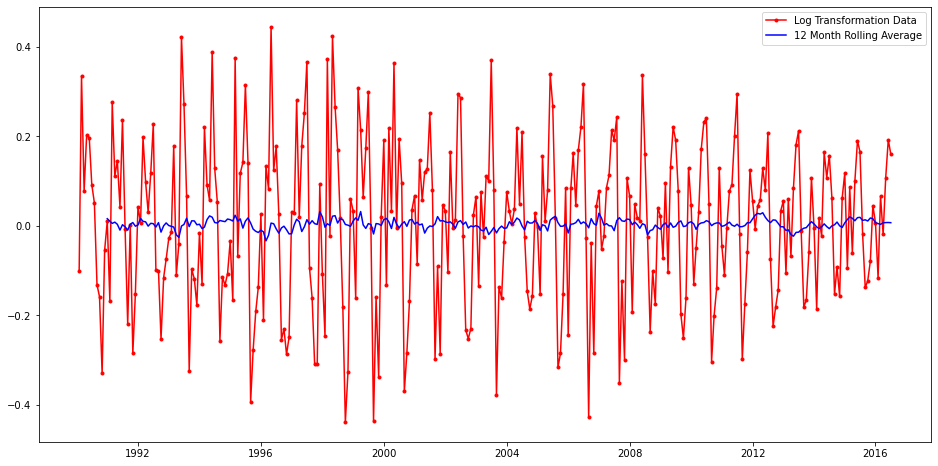

In [29]:
plt.figure(figsize=(16,8))
data_logshft = logdata - logdata.shift(periods = 1)


plt.plot(data_logshft, color='r', marker='.', label = 'Log Transformation Data')
plt.plot(data_logshft.rolling(window = 12).mean(), color='b', label = '12 Month Rolling Average')
plt.legend()
plt.show()

In [30]:
#Do ADF test, but first remove null values

data_logshft = data_logshft.dropna()

adftest = adfuller(data_logshft['Value'])
adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
for key,value in adftest[4].items():
 adfoutput['Critical Value (%s)'%key] = value
print(adfoutput)

Test Statistic         -5.783155e+00
p-value                 5.070554e-07
Lags Used               1.400000e+01
No. of Observations     3.030000e+02
Critical Value (1%)    -3.452118e+00
Critical Value (5%)    -2.871127e+00
Critical Value (10%)   -2.571878e+00
dtype: float64


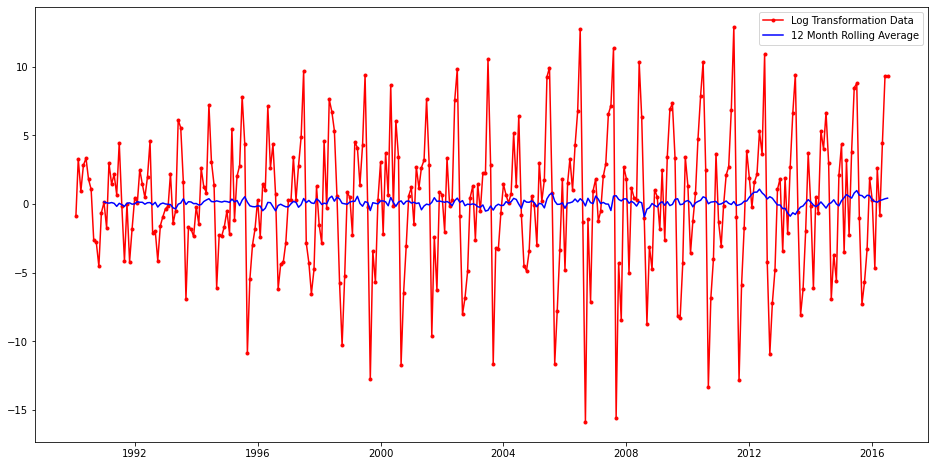

In [31]:
#Investigate the effect of performing the shift without the log transformation

plt.figure(figsize=(16,8))
data_shftonly = data - data.shift(periods = 1)


plt.plot(data_shftonly, color='r', marker='.', label = 'Log Transformation Data')
plt.plot(data_shftonly.rolling(window = 12).mean(), color='b', label = '12 Month Rolling Average')
plt.legend()
plt.show()

In [32]:
#Do ADF test, but first remove null values

data_shftonly = data_shftonly.dropna()

adftest = adfuller(data_shftonly['Value'])
adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
for key,value in adftest[4].items():
 adfoutput['Critical Value (%s)'%key] = value
print(adfoutput)

Test Statistic           -5.102991
p-value                   0.000014
Lags Used                14.000000
No. of Observations     303.000000
Critical Value (1%)      -3.452118
Critical Value (5%)      -2.871127
Critical Value (10%)     -2.571878
dtype: float64


Three data corrections were attempted to make the data stationary, and are show with their ADF Test p-values:
* Log Transformation:           p-value = 0.998409
* Log Trans. & 12 month shift:  p-value = 0.000026
* 12 month shift ONLY:          p-value = 0.000003

From this, the best p-value (representing the greatest confidence that the null hypothesis can be rejected) was yielded from simply shifting the data by 12 months without the log transformation.  Both datasets involving a shift however are sufficiently lower than the .05 criteria for null hypothesis rejection.

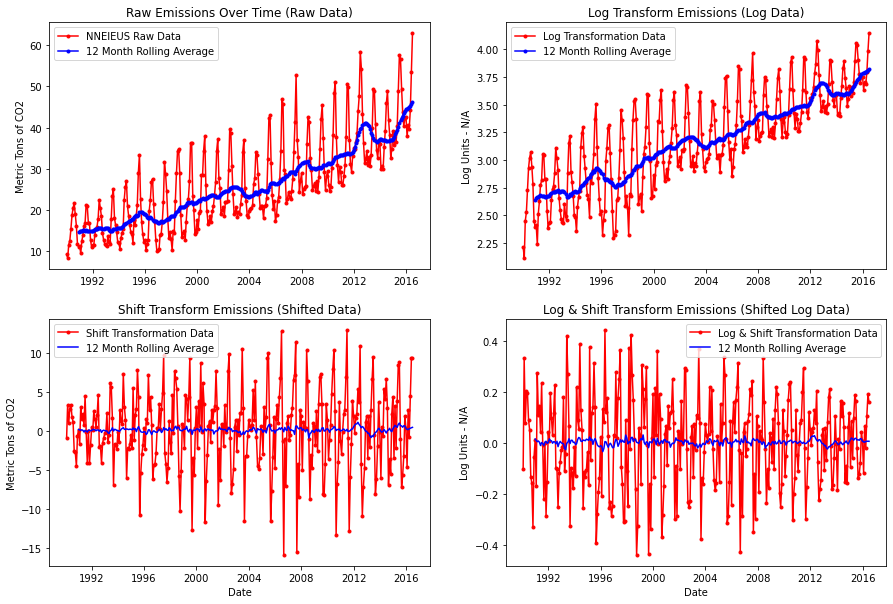

In [159]:
#DataSet Plots for PORTFOLIO


plt.figure(figsize=(15,10)).patch.set_facecolor("white")

plt.subplot(2,2,1)
plt.xlabel("")
plt.ylabel("Metric Tons of CO2")
plt.title('Raw Emissions Over Time (Raw Data)')
NNEIEUS = plt.plot(data, color = 'r', marker='.', label = 'NNEIEUS Raw Data')
Rolling_Average12 = plt.plot(rlav12, color = 'b', marker='.', label = '12 Month Rolling Average')
plt.legend()

plt.subplot(2,2,2)
plt.xlabel("")
plt.ylabel("Log Units - N/A")
plt.title('Log Transform Emissions (Log Data)')
Log_data = plt.plot(logdata, color = 'r', marker='.', label = 'Log Transformation Data')
Rolling_Average12 = plt.plot(logdata.rolling(window=12).mean(), color = 'b', marker='.', label = '12 Month Rolling Average')
plt.legend()

plt.subplot(2,2,4)
plt.xlabel("Date")
plt.ylabel("Log Units - N/A")
plt.title('Log & Shift Transform Emissions (Shifted Log Data)')
plt.plot(data_logshft, color='r', marker='.', label = 'Log & Shift Transformation Data')
plt.plot(data_logshft.rolling(window = 12).mean(), color='b', label = '12 Month Rolling Average')
plt.legend()

plt.subplot(2,2,3)
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title('Shift Transform Emissions (Shifted Data)')
plt.plot(data_shftonly, color='r', marker='.', label = 'Shift Transformation Data')
plt.plot(data_shftonly.rolling(window = 12).mean(), color='b', label = '12 Month Rolling Average')
plt.legend()
plt.show()

# 3 - Data Decomposition and Autocorrelation Functions

## 3.1 - Decomposition

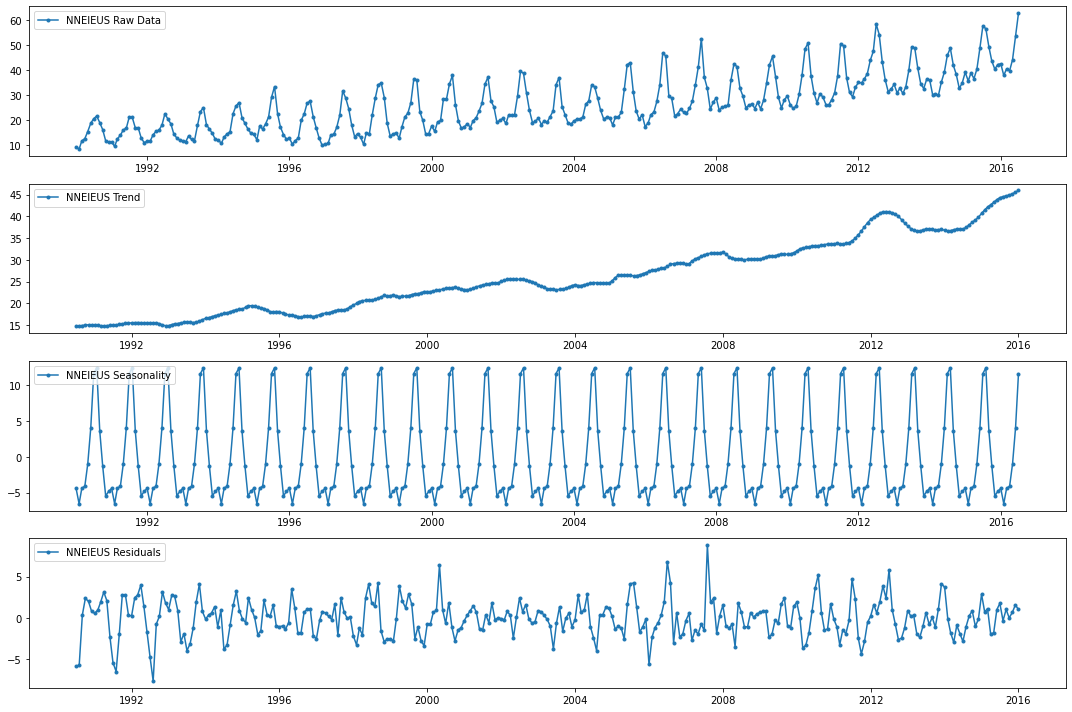

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))

#Plot Raw Data
plt.subplot(411)
plt.plot(data, label='NNEIEUS Raw Data', marker='.')
plt.legend(loc='upper left')

#Plot Trend Component
plt.subplot(412)
plt.plot(trend, label='NNEIEUS Trend', marker='.')
#plt.plot(rlav12, color = 'r', marker='.', label = '12 Month Rolling Average')
plt.legend(loc='upper left')

#Plot Seasonality Component
plt.subplot(413)
plt.plot(seasonal, label='NNEIEUS Seasonality', marker='.')
plt.legend(loc='upper left')

#Plot Residual Component
plt.subplot(414)
plt.plot(residual, label='NNEIEUS Residuals', marker='.')
plt.legend(loc='upper left')

plt.tight_layout()

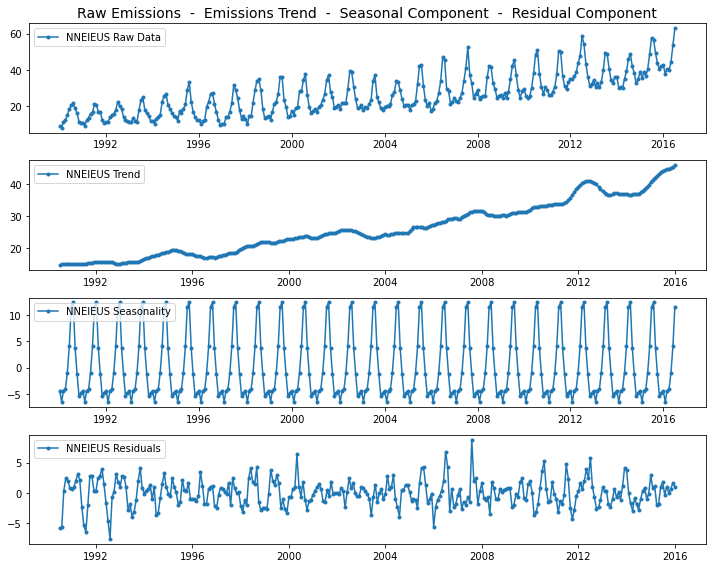

In [167]:
#Formatted for PORTFOLIO

plt.figure(figsize=(10,8)).patch.set_facecolor("white")

#Plot Raw Data
plt.subplot(411)
plt.title('Raw Emissions  -  Emissions Trend  -  Seasonal Component  -  Residual Component', fontsize = 14)
plt.plot(data, label='NNEIEUS Raw Data', marker='.')
plt.legend(loc='upper left')

#Plot Trend Component
plt.subplot(412)
plt.plot(trend, label='NNEIEUS Trend', marker='.')
plt.legend(loc='upper left')

#Plot Seasonality Component
plt.subplot(413)
plt.plot(seasonal, label='NNEIEUS Seasonality', marker='.')
plt.legend(loc='upper left')

#Plot Residual Component
plt.subplot(414)
plt.plot(residual, label='NNEIEUS Residuals', marker='.')
plt.legend(loc='upper left')

plt.tight_layout()

## Observations:
* Natural gas consumption for electric energy peaks around June/July/August
* Possible reason for this is greater electric demand for air conditioning in warmer months
* Though this the following point is mere speculation, another element to consider is the use of natural gas for home heating and how it's possible that natural gas is used for electricity in the warmer months and redirected for home heating in colder months.  Again, it's important to note that this just concerns energy sources for electricity production, and does not include ALL potential uses for each resource.  In  other words, this may not necessarily represent a drop in natural gas demand, but may actually be a result of the resource being utilized differently throughout the year.

## 3.2 - Autocorrelation Functions:  ACF and PCF

<Figure size 1152x576 with 0 Axes>

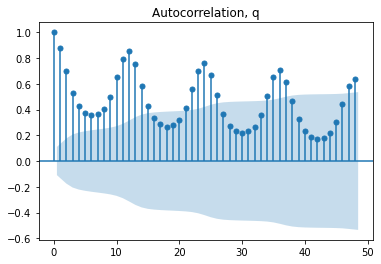

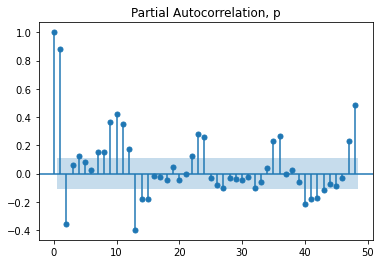

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(data, lags = 48) #ACF gives q value
plt.title('Autocorrelation, q')
plt.show() 
plot_pacf(data, lags = 48)  #PACF gives p values
plt.title('Partial Autocorrelation, p')
plt.show()

# 4 - Define Model Functions
    

## 4.1 - Define Autoregressive (AR) Model Function

This model will model input data x, for a provided lag p, and if chosen to iterate the AR model (z = yes) will run the model and calculate RMSE values for a range of lags from 0 to k.

In [35]:
def armodel(x, p, z, k, plot): #x = Data, p = lags, z = RMSE prog yes (1) or no (0), k = lags in iterator
    model_AR = AutoReg(x, lags=p) # ***
    results_AR = model_AR.fit() # ***
    
    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.plot(x, label = 'Input Data')
        predict = results_AR.predict(start=0,end=len(x)-1) #***      predict the series 
        predict = predict.fillna(0) #****   Converting NaN values to 0
        plt.plot(predict, color='red', label = 'Fitted Values')
        plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict,x['Value'], squared=False))  #Calculating rmse
        plt.legend()
        plt.show()
        print('AIC Value: ' + str(results_AR.aic))

    #Track RMSE over p = 0 to k to verify proper behavior.  RMSE should decrease with each iteration
    if z == 'yes': 
        p1=0
        while p1 <= k:
            model_AR_iterate = AutoReg(x, lags=p1) # ***
            results_AR_iterate = model_AR_iterate.fit() # ***

            predict_iterate = results_AR_iterate.predict(start=0,end=len(x)-1) #***      predict the series 
            predict_iterate = predict_iterate.fillna(0) #****   Converting NaN values to 0
            print(mean_squared_error(predict_iterate,x['Value'], squared=False))
            p1 += 1
    return results_AR.fittedvalues

## 4.2 - Define Moving Average Model
This model will model input data x, for a provided q, and if chosen to iterate the MA model (z = yes (1) or no (0)) will run the model and calculate RMSE values for a range of q values from 0 to k.

In [36]:
def mamodel(x, q, z, k, plot): #x = Data, y = q, z = RMSE prog yes (1) or no (0), k = lags in iterator
   
    model_MA = ARIMA(x, order=(0, 0, q)) #Using p=0, d=0, q=12
    results_MA = model_MA.fit()
    
    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.plot(x, label = 'Input Data')
        plt.plot(results_MA.fittedvalues, color='red', label= 'Fitted Values')
        plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues,x['Value'], squared=False))
        plt.legend()
        plt.show()
        print('AIC Value: ' + str(results_MA.aic))
    
    #Track RMSE over q = 0 to 12 to verify proper behavior.  RMSE should decrease with each iteration
    if z == 'yes':     
        q1=0
        while q1 <= k:
            model_MA_iterate = ARIMA(x, order=(0, 0, q1)) #Using p=0, d=0, q=k
            results_MA_iterate = model_MA_iterate.fit()
            print(mean_squared_error(results_MA_iterate.fittedvalues,x['Value'], squared=False))
            q1 += 1   
    return results_MA.fittedvalues

## 4.3 - Define Autoregressive Moving Average (ARMA) Model
This model will model input data x, for a provided q, provided lag p, and if chosen to iterate the MA model (z = yes) will run the model and calculate RMSE values for a range of q values from 0 to k.

In [37]:
def armamodel(x, p, q, z, k, plot): #x = Data, p = lags, q = q, z = RMSE prog yes (1) or no (0), k = lags in iterator
    model_ARMA = ARIMA(x, order=(p, 0, q)) #Using p=11, d=0, q=11
    results_ARMA = model_ARMA.fit()
    
    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.plot(x, label = 'Input Data')
        plt.plot(results_ARMA.fittedvalues, color='red', label = 'Fitted Values')
        #plt.plot(x.cumsum(), label = 'Input Data Cumulative Sum')
        #plt.plot(results_ARMA.fittedvalues.cumsum(), color='g', label = 'Cumulative Sum')
        plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues,x['Value'], squared=False))
        plt.legend()
        plt.show()
        print('AIC Value: ' + str(results_ARMA.aic))

    #Track RMSE over p,q = 0 to 12 to verify proper behavior.  RMSE should decrease with each iteration
    if z == 'yes':  
        p1=0
        q1=0
        while p1 <= k:
            model_ARMA_iterate = ARIMA(x, order=(p1, 0, q1)) #Using p=0, d=0, q=12
            results_ARMA_iterate = model_ARMA_iterate.fit()
            print(mean_squared_error(results_ARMA_iterate.fittedvalues,x['Value'], squared=False))
            p1 += 1
            q1 += 1
    return results_ARMA.fittedvalues

## 4.4 - Define Autoregressive Integrating Moving Average (ARIMA) Model
This model will model input data x, for a provided q, provided lag p, integration factor d, and if chosen to iterate the MA model (z = yes) will run the model and calculate RMSE values for a range of q values from 0 to k.

In [38]:
def arimamodel(x, p, d, q, z, k, plot): #x = Data, p = lags, d = integration , q = q, z = RMSE prog yes (1) or no (0), k = lags in iterator
    model_ARIMA = ARIMA(x, order=(p, d, q)) #Using p=12, d=1, q=12
    results_ARIMA = model_ARIMA.fit()
    
    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.plot(x, label = 'Input Data')
        #plt.plot(x.cumsum(), label = 'Input Data Cumulative Sum')
        #plt.plot(results_ARIMA.fittedvalues.cumsum(), color='g', label = 'Cumulative Sum')
        plt.plot(results_ARIMA.fittedvalues, color='red', label = 'Fitted Values')
        plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues,x['Value'], squared=False))
        plt.legend()
        plt.show()
        print('AIC Value: ' + str(results_ARIMA.aic))
   
    #Track RMSE over p,q = 0 to 12 to verify proper behavior.  RMSE should decrease with each iteration
    if z == 'yes':
        p1=0
        q1=0
        while p1 <= k:
            model_ARIMA_iterate = ARIMA(x, order=(p1, d, q1))
            results_ARIMA_iterate = model_ARIMA_iterate.fit()
            print(mean_squared_error(results_ARIMA_iterate.fittedvalues,x['Value'], squared=False))
            p1 += 1
            q1 += 1
    return results_ARIMA.fittedvalues

## 4.5 - Define Seasonal Autoregressive Integrating Moving Average (ARIMA) Model

Not actively used as function.  Coded later as needed.

In [39]:
def sarimamodel(x, p, d, q, s, z, k, plot): #x = Data, p = lags, d = integration , q = q, z = RMSE prog yes (1) or no (0), k = lags in iterator
    model_SARIMA = ARIMA(x, seasonal_order=(p, d, q, s)) #Using p=12, d=1, q=12, s = 12
    results_SARIMA = model_SARIMA.fit()
    
    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.plot(x, label = 'Input Data')
        #plt.plot(x.cumsum(), label = 'Input Data Cumulative Sum')
        #plt.plot(results_SARIMA.fittedvalues.cumsum(), color='g', label = 'Cumulative Sum')
        plt.plot(results_SARIMA.fittedvalues, color='red', label = 'Fitted Values')
        plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,x['Value'], squared=False))
        plt.legend()
        plt.show()
        print('AIC Value: ' + str(results_SARIMA.aic))
    return results_SARIMA.fittedvalues

## 4.6 - Inverse Transform Shift-Only (ITSO)

In [40]:
def Pred_ITSO(indata, title, plot):
    #Make series out of the data
    predictions_shftonly=pd.Series(indata)

    #Cumulative Sum of Predicted Values
    predictions_shftonly_cumsum = predictions_shftonly.cumsum()

    #Add initial value to series, Create series entirely of first log data value
    predictions_shftonly_next = pd.Series(data['Value'].iloc[0], index=logdata.index) #just use the data value

    #Add cumulative sum data to initial log data value
    predictions_shftonly_Final = predictions_shftonly_next.add(predictions_shftonly_cumsum, fill_value=0)

    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.xlabel("Date")
        plt.ylabel("Metric Tons of CO2")
        plt.title(title + ' - SHIFTED-ONLY - Carbon Emissions Over Time', color = 'orange', fontsize=20)
        NNEIEUS = plt.plot(data, color = 'r', marker='.', label = 'NNEIEUS Raw Data')
        Prediction_1 = plt.plot(predictions_shftonly_Final, color = 'b', marker='.', label = 'Prediction' )
        plt.legend()
        plt.show()
    
    return predictions_shftonly_Final

## 4.7 - Inverse Transform Shifted-Log (ITSL)

In [41]:
def Pred_ITSL(indata, title, plot):
    #Make series out of the data
    predictions_logshft=pd.Series(indata)

    #Cumulative Sum of Predicted Values
    predictions_logshft_cumsum = predictions_logshft.cumsum()

    #Add initial value to series
        #Create series entirely of first log data value
    predictions_logshft_log = pd.Series(logdata['Value'].iloc[0], index=logdata.index)
        #Add cumulative sum data to initial log data value
    predictions_logshft_log = predictions_logshft_log.add(predictions_logshft_cumsum, fill_value=0)

    #Exp to remove logarithm
    predictions_logshft_Final = np.exp(predictions_logshft_log) #use exponential function

    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.xlabel("Date")
        plt.ylabel("Metric Tons of CO2")
        plt.title(title + ' - SHIFTED-LOG - Carbon Emissions Over Time', color = 'g', fontsize=20)
        NNEIEUS = plt.plot(data, color = 'r', marker='.', label = 'NNEIEUS Raw Data')
        Prediction_1 = plt.plot(predictions_logshft_Final, color = 'b', marker='.', label = 'Prediction' )
        plt.legend()
        plt.show()
    
    return predictions_logshft_Final

## 4.8 - Inverse Transform Log-Only (ITLO)

In [42]:
def Pred_ITLO(indata, title, plot):
    #Make series out of the data
    predictions_logonly=pd.Series(indata)

#     #Cumulative Sum of Predicted Values
#     predictions_logonly_cumsum = predictions_logonly.cumsum()

#     #Add initial value to series
#         #Create series entirely of first log data value
#     predictions_logonly_log = pd.Series(logonlydata['Value'].iloc[0], index=logonlydata.index)
#         #Add cumulative sum data to initial log data value
#     predictions_logonly_log = predictions_logonly_log.add(predictions_logonly_cumsum, fill_value=0)

    #Exp to remove logarithm
    predictions_logonly_Final = np.exp(predictions_logonly) #use exponential function

    if plot == 'yes':
        plt.figure(figsize=(16,8))
        plt.xlabel("Date")
        plt.ylabel("Metric Tons of CO2")
        plt.title(title + ' - SHIFTED-LOG - Carbon Emissions Over Time', color = 'g', fontsize=20)
        NNEIEUS = plt.plot(data, color = 'r', marker='.', label = 'NNEIEUS Raw Data')
        Prediction_1 = plt.plot(predictions_logonly_Final, color = 'b', marker='.', label = 'Prediction' )
        plt.legend()
        plt.show()
    
    return predictions_logonly_Final

# 5 - Hyperparameter Tuning and Model Selection

Below, a function will be used to iterate multiple p and q values up to 12, which is equal to the number of months in the main seasonal period of the data.  Where both p and q are used, they will be set equal to avoid the time required for 13x13 iterations per model.

## 5.1 - Run AR, MA, ARMA, ARIMA Model Optimization

In [43]:
#define optimization function

def hpopt(inputdata, xform): #Untranformed = 'raw', log = 'log', shift = 'shift', log & shift = 'logshft' 

    #Tuning AR model
    p2=0
    AR_RMSE = []
    while p2 <= 12:
        AR_mod = armodel(inputdata, p2, 'no', 0, 'no')
        if xform == 'raw':
            AR_mod_pred = AR_mod
        if xform == 'log':
            AR_mod_pred = Pred_ITLO(AR_mod, 'AR', 'no')        
        if xform == 'shift': 
            AR_mod_pred = Pred_ITSO(AR_mod, 'AR', 'no')
        if xform == 'logshft':
            AR_mod_pred = Pred_ITSL(AR_mod, 'AR', 'no')
        #print('p = ', p2, ' ', mean_squared_error(AR_mod_pred,data['Value'], squared=False))
        if xform == 'raw':
            AR_RMSE.append(mean_squared_error(AR_mod_pred,data['Value'].iloc[p2:], squared=False))
        elif xform == 'log':
            AR_RMSE.append(mean_squared_error(AR_mod_pred,data['Value'].iloc[p2:], squared=False))   
        else:
            AR_RMSE.append(mean_squared_error(AR_mod_pred,data['Value'], squared=False))
        p2 += 1

    #Tuning MA model
    MA_RMSE = []
    q2=0
    while q2 <= 12:
        MA_mod = mamodel(inputdata, q2, 'no', 0, 'no')
        if xform == 'raw':
            MA_mod_pred = MA_mod
        if xform == 'log':
            MA_mod_pred = Pred_ITLO(MA_mod, 'MA', 'no')        
        if xform == 'shift':
            MA_mod_pred = Pred_ITSO(MA_mod, 'MA', 'no')
        if xform == 'logshft':
            MA_mod_pred = Pred_ITSL(MA_mod, 'MA', 'no')        
        
        #print('q = ', q2, ' ',mean_squared_error(MA_mod_pred,data['Value'], squared=False))
        if xform == 'raw':
            MA_RMSE.append(mean_squared_error(MA_mod_pred,data['Value'], squared=False))
        else:
            MA_RMSE.append(mean_squared_error(MA_mod_pred,data['Value'], squared=False))
        p2 += 1
        q2 += 1

    #Tuning ARMA model
    #armamodel(x, p, q, z, k, plot): #x = Data, p = lags, q = q, z = RMSE prog yes (1) or no (0), k = lags in iterator
    ARMA_RMSE = []
    p2=0
    q2=0
    while p2 <= 12:
        ARMA_mod = armamodel(inputdata, p2, q2, 'no', 0, 'no')
       
        if xform == 'raw':
            ARMA_mod_pred = ARMA_mod
        if xform == 'log':
            ARMA_mod_pred = Pred_ITLO(ARMA_mod, 'ARMA', 'no')        
        if xform == 'shift':
            ARMA_mod_pred = Pred_ITSO(ARMA_mod, 'ARMA', 'no')
        if xform == 'logshft':
            ARMA_mod_pred = Pred_ITSL(ARMA_mod, 'ARMA', 'no') 
        #print('p,q = ', p2, ' ',mean_squared_error(ARMA_mod_pred,data['Value'], squared=False))
        if xform == 'raw':
            ARMA_RMSE.append(mean_squared_error(ARMA_mod_pred,data['Value'], squared=False))
        else:
            #print('p,q = ', p2, ' ',mean_squared_error(ARMA_mod_pred,data['Value'], squared=False))
            ARMA_RMSE.append(mean_squared_error(ARMA_mod_pred,data['Value'], squared=False))
        
        p2 += 1
        q2 += 1

    #Tuning ARIMA model
    #arimamodel(x, p, d, q, z, k, plot): #x = Data, p = lags, d = integration , q = q, z = RMSE prog yes (1) or no (0), k = lags in iterator
    ARIMA_RMSE = []
    p2=0
    q2=0
    while p2 <= 12:
        ARIMA_mod = arimamodel(inputdata, p2, 1, q2, 'no', 0, 'no')
        ARIMA_mod_pred = Pred_ITSO(ARIMA_mod, 'ARIMA', 'no')
        
        if xform == 'raw':
            ARIMA_mod_pred = ARIMA_mod
        if xform == 'log':
            ARIMA_mod_pred = Pred_ITLO(ARIMA_mod, 'ARIMA', 'no')        
        if xform == 'shift':
            ARIMA_mod_pred = Pred_ITSO(ARIMA_mod, 'ARIMA', 'no')
        if xform == 'logshft':
            ARIMA_mod_pred = Pred_ITSL(ARIMA_mod, 'ARIMA', 'no')
        #print('p,q = ', p2, ' ',mean_squared_error(ARIMA_mod_pred,data['Value'], squared=False))
        ARIMA_RMSE.append(mean_squared_error(ARIMA_mod_pred,data['Value'], squared=False))
        p2 += 1
        q2 += 1

    #Print RMSE dataframe to select parameters
    RMSE_df = pd.DataFrame(AR_RMSE)
    RMSE_df = RMSE_df.set_index(np.arange(0,13))
    RMSE_df.columns = ['AR, p']
    RMSE_df['MA, q'] = pd.DataFrame(MA_RMSE)
    RMSE_df['ARMA, p,q'] = pd.DataFrame(ARMA_RMSE)
    RMSE_df['ARIMA, p,q'] = pd.DataFrame(ARIMA_RMSE)
    print(RMSE_df)

In [44]:
print('RMSE Values for Raw Data')
hpopt(data, 'raw')

print('RMSE Values for Log Transformed Data')
hpopt(logdata, 'log')

print('RMSE Values for Shifted Data')
hpopt(data_shftonly, 'shift')

print('RMSE Values for Log Transformed & Shifted Data')
hpopt(data_logshft, 'logshft')

RMSE Values for Raw Data
        AR, p      MA, q  ARMA, p,q  ARIMA, p,q
0   11.050520  11.050520  11.050520    4.935808
1    4.819701   6.786578   4.482883    4.547779
2    4.343234   5.315973   4.394167    3.735433
3    4.323441   4.633942   4.341527    4.375455
4    4.272878   4.536531   3.781570    3.681289
5    4.266327   4.392950   3.533295    3.523764
6    4.271713   4.390104   2.861900    2.674348
7    4.147064   4.337698   2.686868    2.650326
8    4.119552   4.120767   2.692774    2.382397
9    3.723869   4.066340   2.535001    2.358715
10   3.219657   3.958272   2.845607    2.272001
11   2.834413   3.806793   2.610479    2.269836
12   2.640030   3.802688   2.386659    2.486843
RMSE Values for Log Transformed Data
        AR, p      MA, q  ARMA, p,q  ARIMA, p,q
0   11.278536  11.278560  11.278560    4.930290
1    4.819776   7.255950   4.460120    4.582952
2    4.323744   5.538287   4.406049    3.530380
3    4.370473   4.854825   4.386339    3.533014
4    4.286873   4.645653  

# Observations:
Overall, the untransformed data and the log transformed data perform the best across all models, with the lowest RMSE values compared to the raw NNEIEUS data

The ARIMA model appears to perform the best of all the models for the two datasets mentioned.

The best model of all, is an ARMIA model on the log-transformed data with p and q = 10

In [45]:
ARIMA_logdata = arimamodel(logdata, 10, 1, 10, 'no', 0, 'no')
ARIMA_logdata_pred = Pred_ITLO(ARIMA_logdata, 'ARIMA', 'no')
mean_squared_error(ARIMA_logdata_pred,data['Value'], squared=False)

2.2299009074605816

## 5.2 - Run SARIMA Models with Auto ARIMA

Credit to the following source for proper implementation of this model:  https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

In [46]:
SARIMA_data_optimizer = auto_arima(data, start_p=1, start_q=1,
                           max_p=4, max_q=4, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1359.450, Time=0.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1528.117, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1439.440, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1381.122, Time=0.25 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1361.062, Time=0.68 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1361.004, Time=1.72 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1415.564, Time=0.60 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1362.896, Time=2.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1388.882, Time=0.28 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1360.939, Time=0.92 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1360.785, Time=0.84 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1399.866, Time=0.23 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1370.774, Time=0.34 sec
 ARIMA(2,1,0)(0,1,1)[12]

In [47]:
#Run the SARIMA model
SARIMA_data = ARIMA(data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

#Fit the model
SARIMA_data_fit = SARIMA_data.fit()

#Obtain fitted values
SARIMA_data_pred = SARIMA_data_fit.fittedvalues

#Calculate RMSE
mean_squared_error(SARIMA_data_pred,data['Value'], squared=False)

2.259094063532204

In [48]:
SARIMA_data_optimizer = auto_arima(logdata, start_p=1, start_q=1,
                           max_p=4, max_q=4, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-442.408, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-535.389, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-587.270, Time=0.55 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-482.373, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-585.760, Time=0.66 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-585.681, Time=1.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-551.617, Time=0.47 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-583.270, Time=1.48 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-571.112, Time=0.41 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-605.435, Time=1.04 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-505.529, Time=0.20 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=-605.639, Time=2.02 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=-565.835, Time=0.36 sec
 ARIMA(0,1,2)(2,1,1)[12]

In [49]:
#Run the SARIMA model
SARIMA_logdata = ARIMA(logdata, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12))

#Fit the model
SARIMA_logdata_fit = SARIMA_logdata.fit()

#Obtain fitted values
SARIMA_logdata_fitted = SARIMA_logdata_fit.fittedvalues

#Exp to remove logarithm
SARIMA_logdata_pred = np.exp(SARIMA_logdata_fitted) #use exponential function

#Calculate RMSE
mean_squared_error(SARIMA_logdata_pred,data['Value'], squared=False)

2.510728878341793

## 5.3 - Other Models

In [50]:
 # ***** look at a model which optimizes ARIMA and seasonal parameters  (10, 1, 10) (0, 1, 1, 12)
    
#Run the SARIMA model
SARIMA_data_1010 = ARIMA(data, order=(10, 1, 10), seasonal_order=(0, 1, 1, 12))

#Fit the model
SARIMA_data__1010_fit = SARIMA_data_1010.fit()

#Obtain fitted values
SARIMA_data_1010_pred = SARIMA_data__1010_fit.fittedvalues

#Calculate RMSE
mean_squared_error(SARIMA_data_1010_pred,data['Value'], squared=False)

2.1682151945846875

## 5.4 - Model Comparison and Selection

The best non-seasonal and three SARIMA models are plotted below.

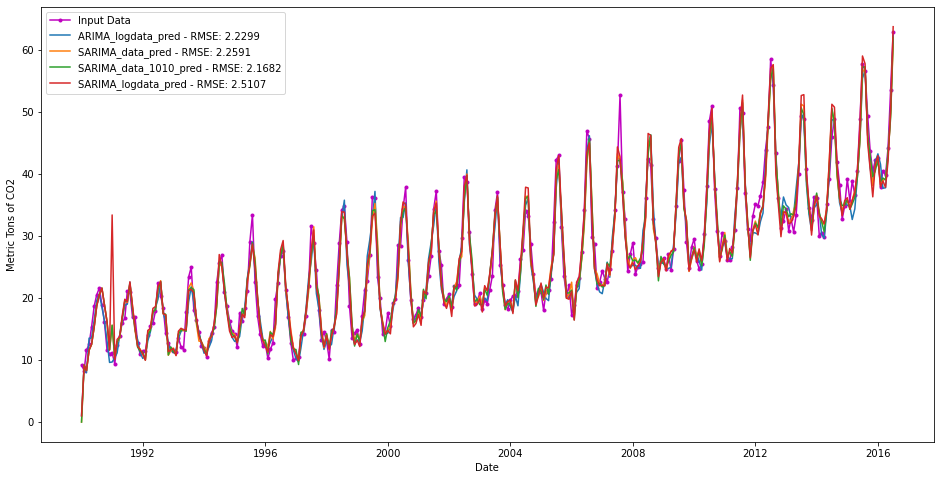

In [126]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data, color='m', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_pred, label = 'ARIMA_logdata_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred,data['Value'], squared=False))
plt.plot(SARIMA_data_pred, label = 'SARIMA_data_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred,data['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred, label = 'SARIMA_data_1010_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred,data['Value'], squared=False))
plt.plot(SARIMA_logdata_pred, label = 'SARIMA_logdata_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred,data['Value'], squared=False))
plt.legend()
plt.show()   

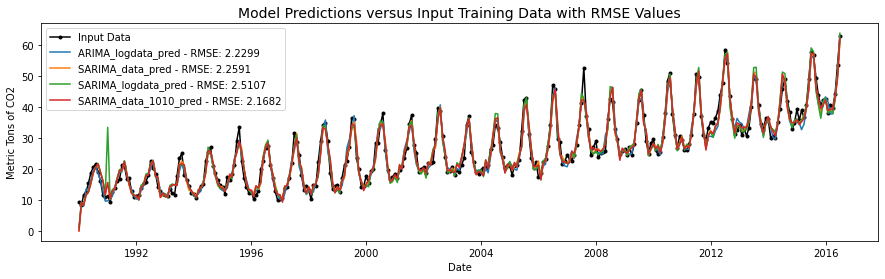

In [169]:
# Plot formatted for PORTFOLIO

plt.figure(figsize=(15,4)).patch.set_facecolor('white')
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.title("Model Predictions versus Input Training Data with RMSE Values", fontsize =14)
plt.plot(data, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_pred, label = 'ARIMA_logdata_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred,data['Value'], squared=False))
plt.plot(SARIMA_data_pred, label = 'SARIMA_data_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred,data['Value'], squared=False))
plt.plot(SARIMA_logdata_pred, label = 'SARIMA_logdata_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred,data['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred, label = 'SARIMA_data_1010_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred,data['Value'], squared=False))

plt.legend()
plt.show()   

# 6 - Model Validation

##  6.1 - Create Test and Train Datasets

In [52]:
#Use the last year of the data for a test dataset and the reaminder for the train dataset
data_90_train = data[data.index < "2015-08-01"]
data_90_test = data[data.index >= "2015-08-01"]

#Create a log transformation dataset for models which use log trasnforms
logdata_90_train = np.log(data_90_train)

## 6.2 - Train Best Performing Models and Predict Last 12 Months of Data

### 6.2.1 - Train Models on Training Data

### Model 1 - ARIMA p10,d1,q10 on Log Transformed Data

In [53]:
#Need to write out all code instead of using "arimamodel" function since local variables within that model are required for
# the prediction, specifically ARIMA_logdata_train_fit.

ARIMA_logdata_train = ARIMA(logdata_90_train, order = (10, 1, 10)) #Run the model
ARIMA_logdata_train_fit = ARIMA_logdata_train.fit() #fit the model
ARIMA_logdata_train_fitted = ARIMA_logdata_train_fit.fittedvalues #output fitted values
ARIMA_logdata_train_pred_log = pd.Series(ARIMA_logdata_train_fitted) #create a series from the data
ARIMA_logdata_train_pred = np.exp(ARIMA_logdata_train_pred_log) #use exponential function to remove log transform
mean_squared_error(ARIMA_logdata_train_pred,data_90_train['Value'], squared=False) #Calculate RMSE     


2.233038201193962

### Model 2 - SARIMA p1,d1,q1 P0,D1,Q1,S12 on Untransformed Data

In [54]:
SARIMA_data_train = ARIMA(data_90_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_data_train_fit = SARIMA_data_train.fit() #Fit the model
SARIMA_data_train_pred = SARIMA_data_train_fit.fittedvalues #Obtain fitted values
mean_squared_error(SARIMA_data_train_pred,data_90_train['Value'], squared=False) #Calculate RMSE

2.2689275578041124

### Model 3 - SARIMA p10,d1,q10 P0,D1,Q1,S12 on Untransformed Data

In [55]:
SARIMA_1010_data_train = ARIMA(data_90_train, order=(10, 1, 10), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_1010_data_train_fit = SARIMA_1010_data_train.fit() #Fit the model
SARIMA_1010_data_train_pred = SARIMA_1010_data_train_fit.fittedvalues #Obtain fitted values
mean_squared_error(SARIMA_1010_data_train_pred,data_90_train['Value'], squared=False) #Calculate RMSE

2.173318460371721

### Model 4 - SARIMA p3,d1,q4 P0,D1,Q1,S12 on Log Transformed Data

In [56]:
SARIMA_logdata_train = ARIMA(logdata_90_train, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_train_fit = SARIMA_logdata_train.fit() #Fit the model
SARIMA_logdata_train_fitted = SARIMA_logdata_train_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_train_pred = np.exp(SARIMA_logdata_train_fitted) #Exp to remove logarithm
mean_squared_error(SARIMA_logdata_train_pred,data_90_train['Value'], squared=False) #Calculate RMSE

2.5177264700617727

### 6.2.2 - Forecasting

In [57]:
#Model 1 - Forecast
ARIMA_logdata_train_forecast_log = ARIMA_logdata_train_fit.forecast(steps = 12)
ARIMA_logdata_train_forecast = np.exp(ARIMA_logdata_train_forecast_log)

#Model 2 - Forecast
SARIMA_data_forecast = SARIMA_data_train_fit.forecast(steps=12)

#Model 3 - Forecast
SARIMA_1010_data_forecast = SARIMA_1010_data_train_fit.forecast(steps = 12)

#Model 4 - Forecast
SARIMA_logdata_forecast_log = SARIMA_logdata_train_fit.forecast(steps = 12)
SARIMA_logdata_forecast = np.exp(SARIMA_logdata_forecast_log)


### 6.2.3 - Compare Results to Test Data

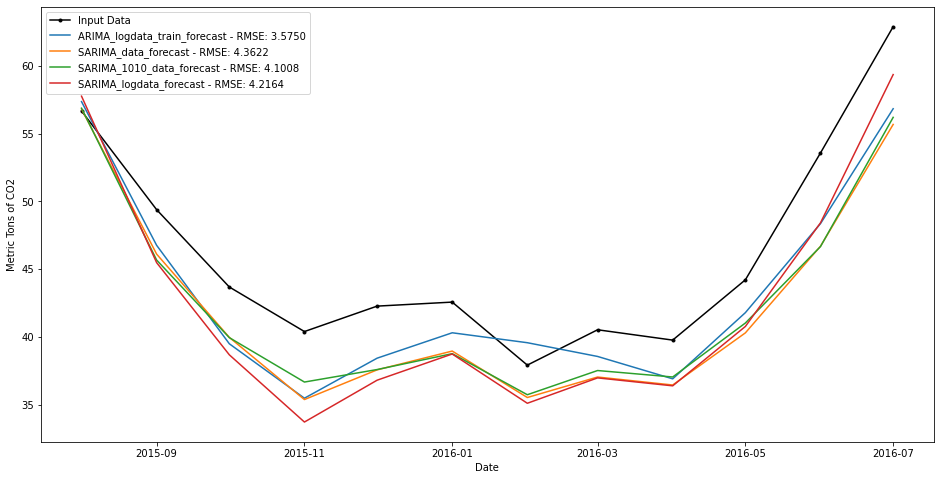

In [58]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_train_forecast, label = 'ARIMA_logdata_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_forecast, label = 'SARIMA_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_forecast, label = 'SARIMA_1010_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_forecast, label = 'SARIMA_logdata_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_forecast,data_90_test['Value'], squared=False))

plt.legend()
plt.show()   

### OBSERVATIONS:
Forecasts from all models are low in comparison to the test data with the ARIMA model performing the best.

### 6.2.4 - Compare Results to Test Data, Model Fits in the Last Year

It would be good to compare the forecasts of each model from 2015-08-01 to 2016-07-01 to the corresponding timeframe of the previously fitted data for the same models against the whole dataset.  In other words, compare to the data from the last year of the predictions/fits of those models over the range 1990-01-01 through 2016-07-01.

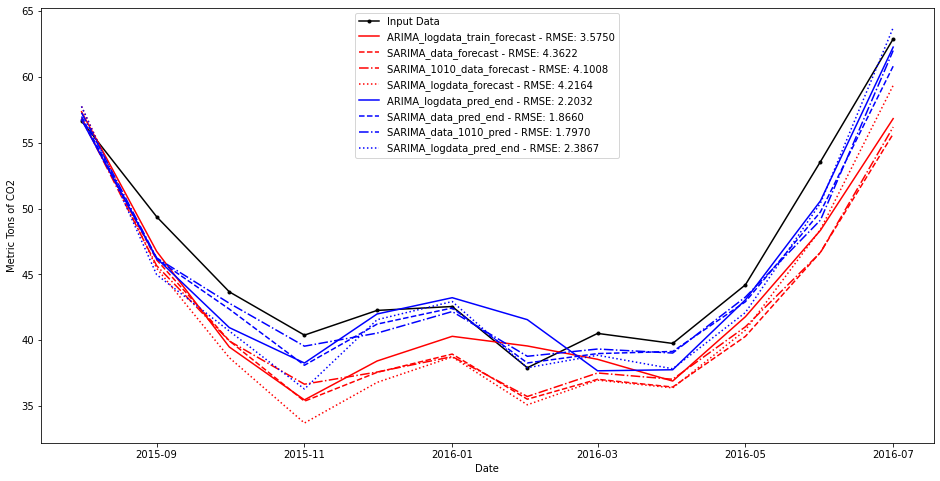

In [59]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_train_forecast, color = 'r', ls = '-', label = 'ARIMA_logdata_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_forecast, color = 'r', ls = '--', label = 'SARIMA_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_forecast, color = 'r', ls = '-.', label = 'SARIMA_1010_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_forecast, color = 'r', ls = ':', label = 'SARIMA_logdata_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_forecast,data_90_test['Value'], squared=False))

#plot these against data previously fitted to known values using these models
ARIMA_logdata_pred_end = ARIMA_logdata_pred[ARIMA_logdata_pred.index >= "2015-08-01"]
SARIMA_data_pred_end = SARIMA_data_pred[SARIMA_data_pred.index >= "2015-08-01"]
SARIMA_data_1010_pred_end = SARIMA_data_1010_pred[SARIMA_data_1010_pred.index >= "2015-08-01"]
SARIMA_logdata_pred_end = SARIMA_logdata_pred[SARIMA_logdata_pred.index >= "2015-08-01"]

plt.plot(ARIMA_logdata_pred_end, color = 'b', ls = '-', label = 'ARIMA_logdata_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred_end,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_pred_end, color = 'b', ls = '--', label = 'SARIMA_data_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred_end,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred_end, color = 'b', ls = '-.', label = 'SARIMA_data_1010_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred_end,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_pred_end, color = 'b', ls = ':', label = 'SARIMA_logdata_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred_end,data_90_test['Value'], squared=False))
plt.legend()
plt.show()   

### OBSERVATIONS:
The model forecasts are shown above by the red lines, and and the blue lines represent the original model prediction/fit data over the corresponding timeframe for each model.  Note that the original data fits are closer to the actual test dataset than the forecasts for all models.  The RMSE values also reflect this observation.

From this, it can be seen that the models are over-fitting.  This may mean that the model is attempting to fit too much data, and that the model may be made more accurate by choosing a shorter (and possibly more relevant) time frame over which the models can be trained to provide better forecasts.

## 6.3 - Model Refinement with Smaller Dataset

### 6.3.1 - Create Smaller Dataset (2010 onward)
Trim back the training data even further to only include data from 2010 onward.

The hypothesis being explored is that the models will more accurately fit a smaller training dataset closer to the timeframe of the actual forecast and provide a better overall forecast.

In [60]:
data_2010_train = data_90_train[data_90_train.index > "2009-12-01"]

#Create a log transformation dataset for models which use log trasnforms
logdata_2010_train = np.log(data_2010_train)

In [61]:
#Need to write out all code instead of using "arimamodel" function since local variables within that model are required for
# the prediction, specifically ARIMA_logdata_2010_train_fit.

ARIMA_logdata_2010_train = ARIMA(logdata_2010_train, order = (10, 1, 10)) #Run the model
ARIMA_logdata_2010_train_fit = ARIMA_logdata_2010_train.fit() #fit the model
ARIMA_logdata_2010_train_fitted = ARIMA_logdata_2010_train_fit.fittedvalues #output fitted values
ARIMA_logdata_2010_train_pred_log = pd.Series(ARIMA_logdata_2010_train_fitted) #create a series from the data
ARIMA_logdata_2010_train_pred = np.exp(ARIMA_logdata_2010_train_pred_log) #use exponential function to remove log transform
#mean_squared_error(ARIMA_logdata_2010_train_pred,data_2010_train['Value'], squared=False) #Calculate RMSE    

In [62]:
SARIMA_data_2010_train = ARIMA(data_2010_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_data_2010_train_fit = SARIMA_data_2010_train.fit() #Fit the model
SARIMA_data_2010_train_pred = SARIMA_data_2010_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_data_2010_train_pred,data_2010_train['Value'], squared=False) #Calculate RMSE

In [63]:
SARIMA_1010_data_2010_train = ARIMA(data_2010_train, order=(10, 1, 10), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_1010_data_2010_train_fit = SARIMA_1010_data_2010_train.fit() #Fit the model
SARIMA_1010_data_2010_train_pred = SARIMA_1010_data_2010_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_1010_data_2010_train_pred,data_2010_train['Value'], squared=False) #Calculate RMSE

In [64]:
SARIMA_logdata_2010_train = ARIMA(logdata_2010_train, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_2010_train_fit = SARIMA_logdata_2010_train.fit() #Fit the model
SARIMA_logdata_2010_train_fitted = SARIMA_logdata_2010_train_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_2010_train_pred = np.exp(SARIMA_logdata_2010_train_fitted) #Exp to remove logarithm
#mean_squared_error(SARIMA_logdata_2010_train_pred,data_2010_train['Value'], squared=False) #Calculate RMSE

Plot the model fits trained against the smaller "2010 onward" training dataset, with the original model fits trained against the full dataset from 1990 onward.
Doing this will help determine how well the model is fitting against the training data.  The hypothesis is that fitting against a smaller dataset that is more relevant to the 2016-2017 timeframe will produce a better data fit/prediction and forecast.

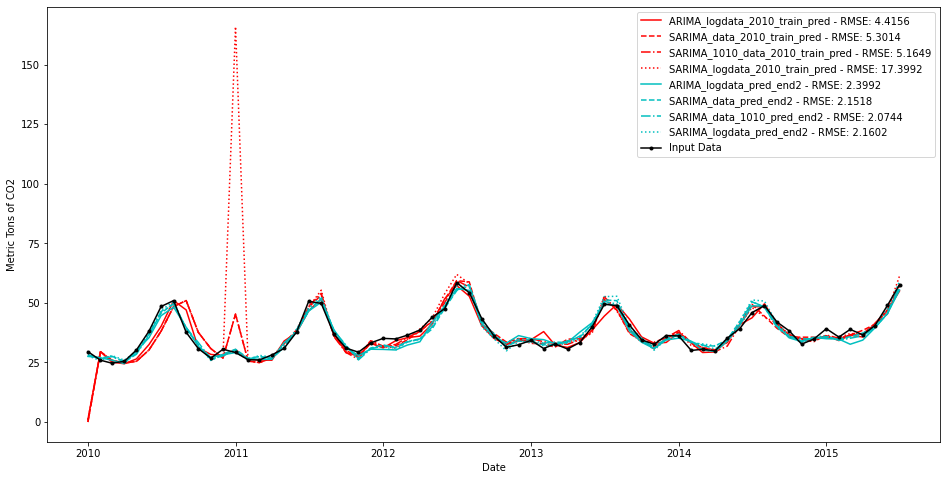

In [65]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")

plt.plot(ARIMA_logdata_2010_train_pred, color = 'r', ls = '-', label = 'ARIMA_logdata_2010_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2010_train_pred,data_2010_train['Value'], squared=False))
plt.plot(SARIMA_data_2010_train_pred, color = 'r', ls = '--', label = 'SARIMA_data_2010_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2010_train_pred,data_2010_train['Value'], squared=False))
plt.plot(SARIMA_1010_data_2010_train_pred, color = 'r', ls = '-.', label = 'SARIMA_1010_data_2010_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2010_train_pred,data_2010_train['Value'], squared=False))
plt.plot(SARIMA_logdata_2010_train_pred, color = 'r', ls = ':', label = 'SARIMA_logdata_2010_train_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2010_train_pred,data_2010_train['Value'], squared=False))

#plot these against data previously fitted to known values using these models
ARIMA_logdata_pred_end2 = ARIMA_logdata_pred[(ARIMA_logdata_pred.index >= "2010-01-01") & (ARIMA_logdata_pred.index < "2015-08-01")]
SARIMA_data_pred_end2 = SARIMA_data_pred[(SARIMA_data_pred.index >= "2010-01-01") & (SARIMA_data_pred.index < "2015-08-01")]
SARIMA_data_1010_pred_end2 = SARIMA_data_1010_pred[(SARIMA_data_1010_pred.index >= "2010-01-01") & (SARIMA_data_1010_pred.index < "2015-08-01")]
SARIMA_logdata_pred_end2 = SARIMA_logdata_pred[(SARIMA_logdata_pred.index >= "2010-01-01") & (SARIMA_logdata_pred.index < "2015-08-01")]

plt.plot(ARIMA_logdata_pred_end2, color = 'c', ls = '-', label = 'ARIMA_logdata_pred_end2'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred_end2,data_2010_train['Value'], squared=False))
plt.plot(SARIMA_data_pred_end2, color = 'c', ls = '--', label = 'SARIMA_data_pred_end2'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred_end2,data_2010_train['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred_end2, color = 'c', ls = '-.', label = 'SARIMA_data_1010_pred_end2'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred_end2,data_2010_train['Value'], squared=False))
plt.plot(SARIMA_logdata_pred_end2, color = 'c', ls = ':', label = 'SARIMA_logdata_pred_end2'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred_end2,data_2010_train['Value'], squared=False))
plt.plot(data_2010_train, color='k', marker='.', label = 'Input Data')
plt.legend()
plt.show() 

In [66]:
#Compare RMSE values after the first 13 datapoints when the anamolaies in the forecasts tend to even out
print("RMSE- ARIMA_logdata_pred_end2: ", mean_squared_error(ARIMA_logdata_pred_end2[13:], data_2010_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_pred_end2: ", mean_squared_error(SARIMA_data_pred_end2[13:], data_2010_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_1010_pred_end2: ", mean_squared_error(SARIMA_data_1010_pred_end2[13:], data_2010_train.Value[13:], squared=False))
print("RMSE- SARIMA_logdata_pred_end2: ", mean_squared_error(SARIMA_logdata_pred_end2[13:], data_2010_train.Value[13:], squared=False))

RMSE- ARIMA_logdata_pred_end2:  2.4990916778520886
RMSE- SARIMA_data_pred_end2:  2.2519294542227506
RMSE- SARIMA_data_1010_pred_end2:  2.1383622562395455
RMSE- SARIMA_logdata_pred_end2:  2.2968059111645722


It can be seen above that some of the SARIMA models have anomalies around the 13th month of the fit, and the other models look to have a one month lag up until that point.  Technically this can also be observed in the fits of previous much larger datasets upon close inspection.  The remainder of the data fits the training dataset well, and when the RMSE values are re-calculated without the first 13 months of the dataset, it's clear that the fits on the smaller dataset are much closer to the fits rendered by the models from the full dataset.

In [67]:
#Model 1 - Forecast
ARIMA_logdata_2010_train_forecast_log = ARIMA_logdata_2010_train_fit.forecast(steps = 12)
ARIMA_logdata_2010_train_forecast = np.exp(ARIMA_logdata_2010_train_forecast_log)

#Model 2 - Forecast
SARIMA_data_2010_forecast = SARIMA_data_2010_train_fit.forecast(steps=12)

#Model 3 - Forecast
SARIMA_1010_data_2010_forecast = SARIMA_1010_data_2010_train_fit.forecast(steps = 12)

#Model 4 - Forecast
SARIMA_logdata_2010_forecast_log = SARIMA_logdata_2010_train_fit.forecast(steps = 12)
SARIMA_logdata_2010_forecast = np.exp(SARIMA_logdata_2010_forecast_log)

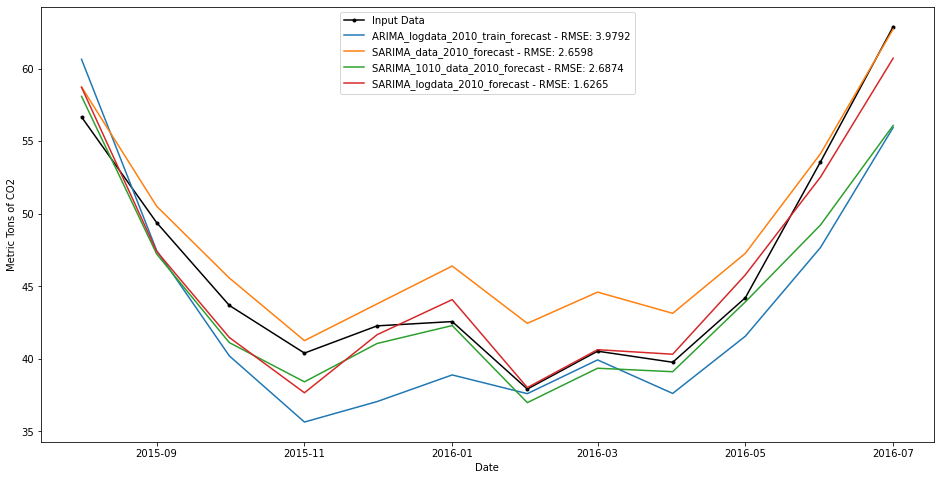

In [68]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_2010_train_forecast, label = 'ARIMA_logdata_2010_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2010_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2010_forecast, label = 'SARIMA_data_2010_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2010_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2010_forecast, label = 'SARIMA_1010_data_2010_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2010_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2010_forecast, label = 'SARIMA_logdata_2010_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2010_forecast,data_90_test['Value'], squared=False))

plt.legend()
plt.show()  

## OBSERVATIONS

Here, the SARIMA models provide relatively good fits compared to the ARIMA model.  Additionally, while the RMSE values for the SARIMA model fitted to raw data and the optimized p10,q10 SARIMA model slightly underperform their fits to the training data, the SARMIA model using the log data outperforms the it fit to the training data.

Compared to the models trained against the full dataset from 1990 onward, the smaller dataset from 2010 onward provides a much better prediction of the test data.

## 6.4 - Model Refinement with a Second Smaller Dataset

Here data from 2005 onward will be explored.  This adds 5 years of data to the training dataset.  This will help determine if adding some additional data to the previous dataset will improve the forecasting.

In [69]:
data_05_train = data_90_train[data_90_train.index > "2004-12-01"]

#Create a log transformation dataset for models which use log trasnforms
logdata_05_train = np.log(data_05_train)

In [70]:
#Need to write out all code instead of using "arimamodel" function since local variables within that model are required for
# the prediction, specifically ARIMA_logdata_05_train_fit.

ARIMA_logdata_05_train = ARIMA(logdata_05_train, order = (10, 1, 10)) #Run the model
ARIMA_logdata_05_train_fit = ARIMA_logdata_05_train.fit() #fit the model
ARIMA_logdata_05_train_fitted = ARIMA_logdata_05_train_fit.fittedvalues #output fitted values
ARIMA_logdata_05_train_pred_log = pd.Series(ARIMA_logdata_05_train_fitted) #create a series from the data
ARIMA_logdata_05_train_pred = np.exp(ARIMA_logdata_05_train_pred_log) #use exponential function to remove log transform
#mean_squared_error(ARIMA_logdata_05_train_pred,data_05_train['Value'], squared=False) #Calculate RMSE    

In [71]:
SARIMA_data_05_train = ARIMA(data_05_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_data_05_train_fit = SARIMA_data_05_train.fit() #Fit the model
SARIMA_data_05_train_pred = SARIMA_data_05_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_data_05_train_pred,data_05_train['Value'], squared=False) #Calculate RMSE

In [72]:
SARIMA_1010_data_05_train = ARIMA(data_05_train, order=(10, 1, 10), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_1010_data_05_train_fit = SARIMA_1010_data_05_train.fit() #Fit the model
SARIMA_1010_data_05_train_pred = SARIMA_1010_data_05_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_1010_data_05_train_pred,data_05_train['Value'], squared=False) #Calculate RMSE

In [73]:
SARIMA_logdata_05_train = ARIMA(logdata_05_train, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_05_train_fit = SARIMA_logdata_05_train.fit() #Fit the model
SARIMA_logdata_05_train_fitted = SARIMA_logdata_05_train_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_05_train_pred = np.exp(SARIMA_logdata_05_train_fitted) #Exp to remove logarithm
#mean_squared_error(SARIMA_logdata_05_train_pred,data_05_train['Value'], squared=False) #Calculate RMSE

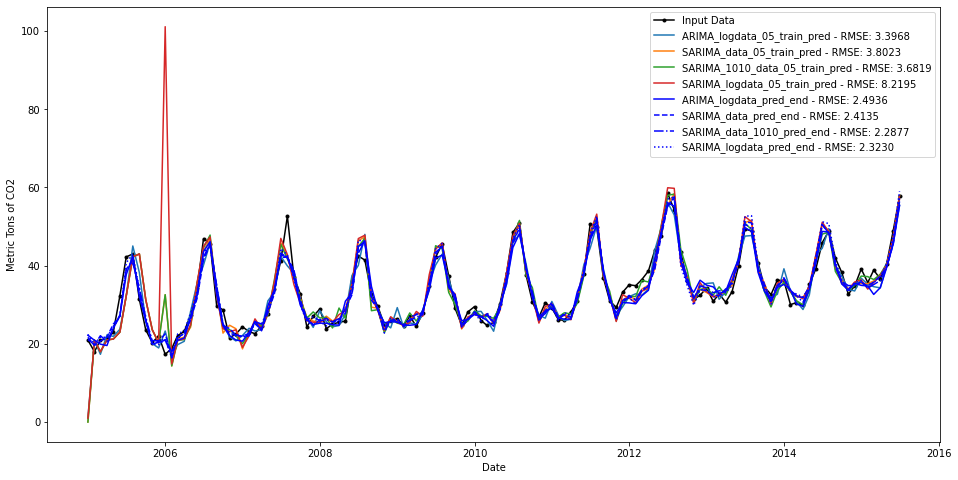

In [74]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_05_train, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_05_train_pred, label = 'ARIMA_logdata_05_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_05_train_pred,data_05_train['Value'], squared=False))
plt.plot(SARIMA_data_05_train_pred, label = 'SARIMA_data_05_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_05_train_pred,data_05_train['Value'], squared=False))
plt.plot(SARIMA_1010_data_05_train_pred, label = 'SARIMA_1010_data_05_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_05_train_pred,data_05_train['Value'], squared=False))
plt.plot(SARIMA_logdata_05_train_pred, label = 'SARIMA_logdata_05_train_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_05_train_pred,data_05_train['Value'], squared=False))

#plot these against data previously fitted to known values using these models
ARIMA_logdata_pred_end = ARIMA_logdata_pred[(ARIMA_logdata_pred.index >= "2005-01-01") & (ARIMA_logdata_pred.index < "2015-08-01")]
SARIMA_data_pred_end = SARIMA_data_pred[(SARIMA_data_pred.index >= "2005-01-01") & (SARIMA_data_pred.index < "2015-08-01")]
SARIMA_data_1010_pred_end = SARIMA_data_1010_pred[(SARIMA_data_1010_pred.index >= "2005-01-01") & (SARIMA_data_1010_pred.index < "2015-08-01")]
SARIMA_logdata_pred_end = SARIMA_logdata_pred[(SARIMA_logdata_pred.index >= "2005-01-01") & (SARIMA_logdata_pred.index < "2015-08-01")]

plt.plot(ARIMA_logdata_pred_end, color = 'b', ls = '-', label = 'ARIMA_logdata_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred_end,data_05_train['Value'], squared=False))
plt.plot(SARIMA_data_pred_end, color = 'b', ls = '--', label = 'SARIMA_data_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred_end,data_05_train['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred_end, color = 'b', ls = '-.', label = 'SARIMA_data_1010_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred_end,data_05_train['Value'], squared=False))
plt.plot(SARIMA_logdata_pred_end, color = 'b', ls = ':', label = 'SARIMA_logdata_pred_end'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred_end,data_05_train['Value'], squared=False))

plt.legend()
plt.show() 

In [75]:
#Compare RMSE values after the first 13 datapoints when the anamolaies in the forecasts tend to even out
print("RMSE- ARIMA_logdata_pred_end: ", mean_squared_error(ARIMA_logdata_pred_end[13:], data_05_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_pred_end: ", mean_squared_error(SARIMA_data_pred_end[13:], data_05_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_1010_pred_end: ", mean_squared_error(SARIMA_data_1010_pred_end[13:], data_05_train.Value[13:], squared=False))
print("RMSE- SARIMA_logdata_pred_end: ", mean_squared_error(SARIMA_logdata_pred_end[13:], data_05_train.Value[13:], squared=False))

RMSE- ARIMA_logdata_pred_end:  2.4870992980046784
RMSE- SARIMA_data_pred_end:  2.3931760267221813
RMSE- SARIMA_data_1010_pred_end:  2.2641616708352927
RMSE- SARIMA_logdata_pred_end:  2.3077530950472287


In [76]:
#Model 1 - Forecast
ARIMA_logdata_05_train_forecast_log = ARIMA_logdata_05_train_fit.forecast(steps = 12)
ARIMA_logdata_05_train_forecast = np.exp(ARIMA_logdata_05_train_forecast_log)

#Model 2 - Forecast
SARIMA_data_05_forecast = SARIMA_data_05_train_fit.forecast(steps=12)

#Model 3 - Forecast
SARIMA_1010_data_05_forecast = SARIMA_1010_data_05_train_fit.forecast(steps = 12)

#Model 4 - Forecast
SARIMA_logdata_05_forecast_log = SARIMA_logdata_05_train_fit.forecast(steps = 12)
SARIMA_logdata_05_forecast = np.exp(SARIMA_logdata_05_forecast_log)

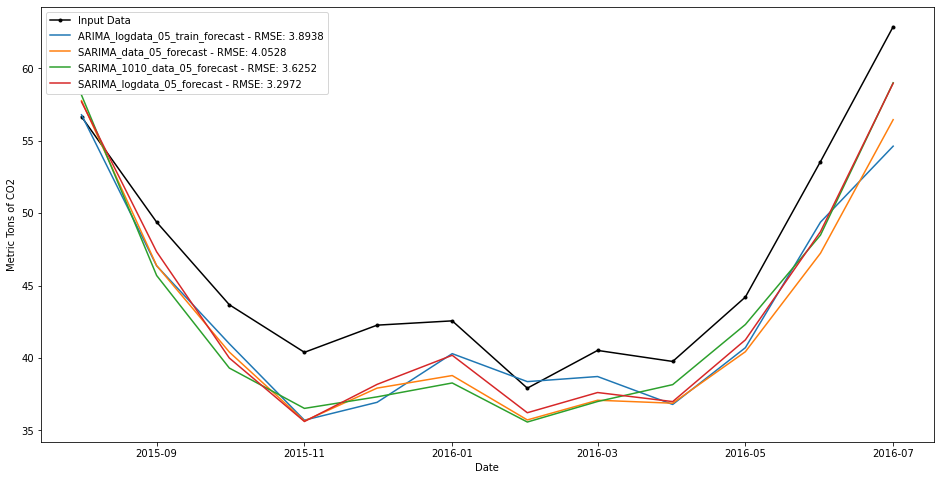

In [77]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_05_train_forecast, label = 'ARIMA_logdata_05_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_05_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_05_forecast, label = 'SARIMA_data_05_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_05_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_05_forecast, label = 'SARIMA_1010_data_05_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_05_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_05_forecast, label = 'SARIMA_logdata_05_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_05_forecast,data_90_test['Value'], squared=False))

plt.legend()
plt.show()   

## 6.5 - Model Refinement with a Second Smaller Dataset


In [78]:
data_2011_train = data_90_train[data_90_train.index > "2010-12-01"]

#Create a log transformation dataset for models which use log trasnforms
logdata_2011_train = np.log(data_2011_train)

In [79]:
#Need to write out all code instead of using "arimamodel" function since local variables within that model are required for
# the prediction, specifically ARIMA_logdata_2011_train_fit.

ARIMA_logdata_2011_train = ARIMA(logdata_2011_train, order = (10, 1, 10)) #Run the model
ARIMA_logdata_2011_train_fit = ARIMA_logdata_2011_train.fit() #fit the model
ARIMA_logdata_2011_train_fitted = ARIMA_logdata_2011_train_fit.fittedvalues #output fitted values
ARIMA_logdata_2011_train_pred_log = pd.Series(ARIMA_logdata_2011_train_fitted) #create a series from the data
ARIMA_logdata_2011_train_pred = np.exp(ARIMA_logdata_2011_train_pred_log) #use exponential function to remove log transform
#mean_squared_error(ARIMA_logdata_2011_train_pred,data_2011_train['Value'], squared=False) #Calculate RMSE    

In [80]:
SARIMA_data_2011_train = ARIMA(data_2011_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_data_2011_train_fit = SARIMA_data_2011_train.fit() #Fit the model
SARIMA_data_2011_train_pred = SARIMA_data_2011_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_data_2011_train_pred,data_2011_train['Value'], squared=False) #Calculate RMSE

In [81]:
SARIMA_1010_data_2011_train = ARIMA(data_2011_train, order=(10, 1, 10), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_1010_data_2011_train_fit = SARIMA_1010_data_2011_train.fit() #Fit the model
SARIMA_1010_data_2011_train_pred = SARIMA_1010_data_2011_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_1010_data_2011_train_pred,data_2011_train['Value'], squared=False) #Calculate RMSE

In [82]:
SARIMA_logdata_2011_train = ARIMA(logdata_2011_train, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_2011_train_fit = SARIMA_logdata_2011_train.fit() #Fit the model
SARIMA_logdata_2011_train_fitted = SARIMA_logdata_2011_train_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_2011_train_pred = np.exp(SARIMA_logdata_2011_train_fitted) #Exp to remove logarithm
#mean_squared_error(SARIMA_logdata_2011_train_pred,data_2011_train['Value'], squared=False) #Calculate RMSE

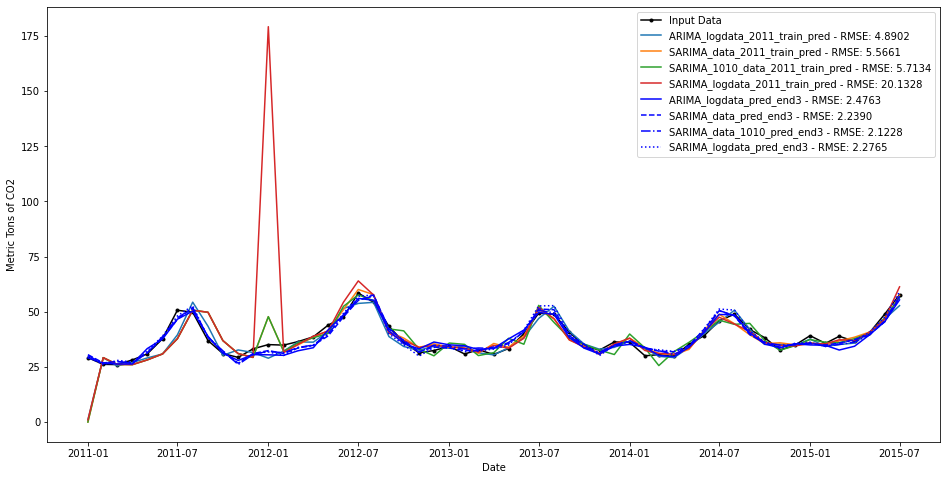

In [83]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_2011_train, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_2011_train_pred, label = 'ARIMA_logdata_2011_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2011_train_pred,data_2011_train['Value'], squared=False))
plt.plot(SARIMA_data_2011_train_pred, label = 'SARIMA_data_2011_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2011_train_pred,data_2011_train['Value'], squared=False))
plt.plot(SARIMA_1010_data_2011_train_pred, label = 'SARIMA_1010_data_2011_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2011_train_pred,data_2011_train['Value'], squared=False))
plt.plot(SARIMA_logdata_2011_train_pred, label = 'SARIMA_logdata_2011_train_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2011_train_pred,data_2011_train['Value'], squared=False))

#plot these against data previously fitted to known values using these models
ARIMA_logdata_pred_end3 = ARIMA_logdata_pred[(ARIMA_logdata_pred.index >= "2011-01-01") & (ARIMA_logdata_pred.index < "2015-08-01")]
SARIMA_data_pred_end3 = SARIMA_data_pred[(SARIMA_data_pred.index >= "2011-01-01") & (SARIMA_data_pred.index < "2015-08-01")]
SARIMA_data_1010_pred_end3 = SARIMA_data_1010_pred[(SARIMA_data_1010_pred.index >= "2011-01-01") & (SARIMA_data_1010_pred.index < "2015-08-01")]
SARIMA_logdata_pred_end3 = SARIMA_logdata_pred[(SARIMA_logdata_pred.index >= "2011-01-01") & (SARIMA_logdata_pred.index < "2015-08-01")]

plt.plot(ARIMA_logdata_pred_end3, color = 'b', ls = '-', label = 'ARIMA_logdata_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred_end3,data_2011_train['Value'], squared=False))
plt.plot(SARIMA_data_pred_end3, color = 'b', ls = '--', label = 'SARIMA_data_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred_end3,data_2011_train['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred_end3, color = 'b', ls = '-.', label = 'SARIMA_data_1010_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred_end3,data_2011_train['Value'], squared=False))
plt.plot(SARIMA_logdata_pred_end3, color = 'b', ls = ':', label = 'SARIMA_logdata_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred_end3,data_2011_train['Value'], squared=False))

plt.legend()
plt.show() 

In [84]:
#Compare RMSE values after the first 13 datapoints when the anamolaies in the forecasts tend3 to even out
print("RMSE- ARIMA_logdata_pred_end33: ", mean_squared_error(ARIMA_logdata_pred_end3[13:], data_2011_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_pred_end33: ", mean_squared_error(SARIMA_data_pred_end3[13:], data_2011_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_1010_pred_end33: ", mean_squared_error(SARIMA_data_1010_pred_end3[13:], data_2011_train.Value[13:], squared=False))
print("RMSE- SARIMA_logdata_pred_end33: ", mean_squared_error(SARIMA_logdata_pred_end3[13:], data_2011_train.Value[13:], squared=False))

RMSE- ARIMA_logdata_pred_end33:  2.567459400437836
RMSE- SARIMA_data_pred_end33:  2.317010881234061
RMSE- SARIMA_data_1010_pred_end33:  2.1682296492055264
RMSE- SARIMA_logdata_pred_end33:  2.3649641875307545


In [85]:
#Model 1 - Forecast
ARIMA_logdata_2011_train_forecast_log = ARIMA_logdata_2011_train_fit.forecast(steps = 12)
ARIMA_logdata_2011_train_forecast = np.exp(ARIMA_logdata_2011_train_forecast_log)

#Model 2 - Forecast
SARIMA_data_2011_forecast = SARIMA_data_2011_train_fit.forecast(steps=12)

#Model 3 - Forecast
SARIMA_1010_data_2011_forecast = SARIMA_1010_data_2011_train_fit.forecast(steps = 12)

#Model 4 - Forecast
SARIMA_logdata_2011_forecast_log = SARIMA_logdata_2011_train_fit.forecast(steps = 12)
SARIMA_logdata_2011_forecast = np.exp(SARIMA_logdata_2011_forecast_log)

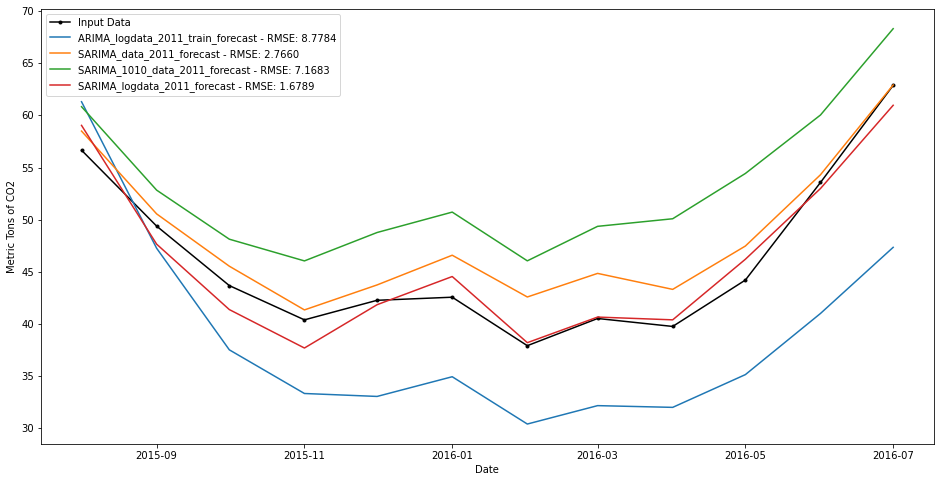

In [86]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_2011_train_forecast, label = 'ARIMA_logdata_2011_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2011_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2011_forecast, label = 'SARIMA_data_2011_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2011_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2011_forecast, label = 'SARIMA_1010_data_2011_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2011_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2011_forecast, label = 'SARIMA_logdata_2011_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2011_forecast,data_90_test['Value'], squared=False))

plt.legend()
plt.show()  

## 6.6 - Model Refinement with a Slightly Larger Dataset

In [87]:
data_2009_train = data_90_train[data_90_train.index > "2008-12-01"]

#Create a log transformation dataset for models which use log trasnforms
logdata_2009_train = np.log(data_2009_train)

In [88]:
#Need to write out all code instead of using "arimamodel" function since local variables within that model are required for
# the prediction, specifically ARIMA_logdata_2009_train_fit.

ARIMA_logdata_2009_train = ARIMA(logdata_2009_train, order = (10, 1, 10)) #Run the model
ARIMA_logdata_2009_train_fit = ARIMA_logdata_2009_train.fit() #fit the model
ARIMA_logdata_2009_train_fitted = ARIMA_logdata_2009_train_fit.fittedvalues #output fitted values
ARIMA_logdata_2009_train_pred_log = pd.Series(ARIMA_logdata_2009_train_fitted) #create a series from the data
ARIMA_logdata_2009_train_pred = np.exp(ARIMA_logdata_2009_train_pred_log) #use exponential function to remove log transform
#mean_squared_error(ARIMA_logdata_2009_train_pred,data_2009_train['Value'], squared=False) #Calculate RMSE    

In [89]:
SARIMA_data_2009_train = ARIMA(data_2009_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_data_2009_train_fit = SARIMA_data_2009_train.fit() #Fit the model
SARIMA_data_2009_train_pred = SARIMA_data_2009_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_data_2009_train_pred,data_2009_train['Value'], squared=False) #Calculate RMSE

In [90]:
SARIMA_1010_data_2009_train = ARIMA(data_2009_train, order=(10, 1, 10), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_1010_data_2009_train_fit = SARIMA_1010_data_2009_train.fit() #Fit the model
SARIMA_1010_data_2009_train_pred = SARIMA_1010_data_2009_train_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_1010_data_2009_train_pred,data_2009_train['Value'], squared=False) #Calculate RMSE

In [91]:
SARIMA_logdata_2009_train = ARIMA(logdata_2009_train, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_2009_train_fit = SARIMA_logdata_2009_train.fit() #Fit the model
SARIMA_logdata_2009_train_fitted = SARIMA_logdata_2009_train_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_2009_train_pred = np.exp(SARIMA_logdata_2009_train_fitted) #Exp to remove logarithm
#mean_squared_error(SARIMA_logdata_2009_train_pred,data_2009_train['Value'], squared=False) #Calculate RMSE

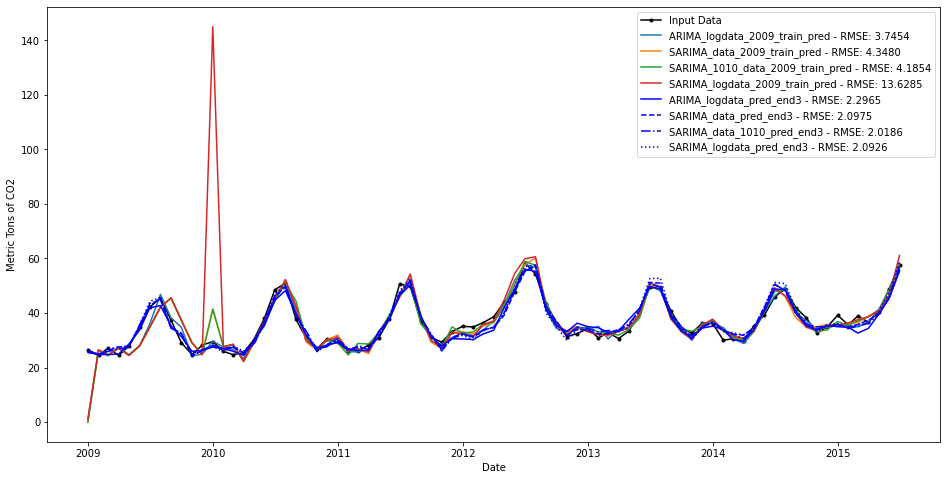

In [92]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_2009_train, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_2009_train_pred, label = 'ARIMA_logdata_2009_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2009_train_pred,data_2009_train['Value'], squared=False))
plt.plot(SARIMA_data_2009_train_pred, label = 'SARIMA_data_2009_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2009_train_pred,data_2009_train['Value'], squared=False))
plt.plot(SARIMA_1010_data_2009_train_pred, label = 'SARIMA_1010_data_2009_train_pred'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2009_train_pred,data_2009_train['Value'], squared=False))
plt.plot(SARIMA_logdata_2009_train_pred, label = 'SARIMA_logdata_2009_train_pred' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2009_train_pred,data_2009_train['Value'], squared=False))

#plot these against data previously fitted to known values using these models
ARIMA_logdata_pred_end3 = ARIMA_logdata_pred[(ARIMA_logdata_pred.index >= "2009-01-01") & (ARIMA_logdata_pred.index < "2015-08-01")]
SARIMA_data_pred_end3 = SARIMA_data_pred[(SARIMA_data_pred.index >= "2009-01-01") & (SARIMA_data_pred.index < "2015-08-01")]
SARIMA_data_1010_pred_end3 = SARIMA_data_1010_pred[(SARIMA_data_1010_pred.index >= "2009-01-01") & (SARIMA_data_1010_pred.index < "2015-08-01")]
SARIMA_logdata_pred_end3 = SARIMA_logdata_pred[(SARIMA_logdata_pred.index >= "2009-01-01") & (SARIMA_logdata_pred.index < "2015-08-01")]

plt.plot(ARIMA_logdata_pred_end3, color = 'b', ls = '-', label = 'ARIMA_logdata_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_pred_end3,data_2009_train['Value'], squared=False))
plt.plot(SARIMA_data_pred_end3, color = 'b', ls = '--', label = 'SARIMA_data_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_pred_end3,data_2009_train['Value'], squared=False))
plt.plot(SARIMA_data_1010_pred_end3, color = 'b', ls = '-.', label = 'SARIMA_data_1010_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_1010_pred_end3,data_2009_train['Value'], squared=False))
plt.plot(SARIMA_logdata_pred_end3, color = 'b', ls = ':', label = 'SARIMA_logdata_pred_end3'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_pred_end3,data_2009_train['Value'], squared=False))

plt.legend()
plt.show() 

In [93]:
#Compare RMSE values after the first 13 datapoints when the anamolaies in the forecasts tend3 to even out
print("RMSE- ARIMA_logdata_pred_end33: ", mean_squared_error(ARIMA_logdata_pred_end3[13:], data_2009_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_pred_end33: ", mean_squared_error(SARIMA_data_pred_end3[13:], data_2009_train.Value[13:], squared=False))
print("RMSE- SARIMA_data_1010_pred_end33: ", mean_squared_error(SARIMA_data_1010_pred_end3[13:], data_2009_train.Value[13:], squared=False))
print("RMSE- SARIMA_logdata_pred_end33: ", mean_squared_error(SARIMA_logdata_pred_end3[13:], data_2009_train.Value[13:], squared=False))

RMSE- ARIMA_logdata_pred_end33:  2.4048726256563997
RMSE- SARIMA_data_pred_end33:  2.1619682410068943
RMSE- SARIMA_data_1010_pred_end33:  2.082585543826058
RMSE- SARIMA_logdata_pred_end33:  2.165266900803969


In [94]:
#Model 1 - Forecast
ARIMA_logdata_2009_train_forecast_log = ARIMA_logdata_2009_train_fit.forecast(steps = 12)
ARIMA_logdata_2009_train_forecast = np.exp(ARIMA_logdata_2009_train_forecast_log)

#Model 2 - Forecast
SARIMA_data_2009_forecast = SARIMA_data_2009_train_fit.forecast(steps=12)

#Model 3 - Forecast
SARIMA_1010_data_2009_forecast = SARIMA_1010_data_2009_train_fit.forecast(steps = 12)

#Model 4 - Forecast
SARIMA_logdata_2009_forecast_log = SARIMA_logdata_2009_train_fit.forecast(steps = 12)
SARIMA_logdata_2009_forecast = np.exp(SARIMA_logdata_2009_forecast_log)

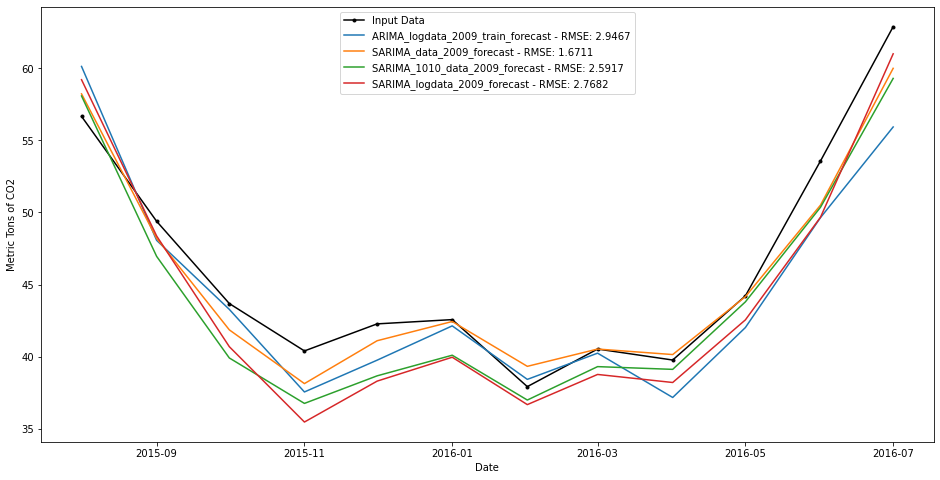

In [95]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')
plt.plot(ARIMA_logdata_2009_train_forecast, label = 'ARIMA_logdata_2009_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2009_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2009_forecast, label = 'SARIMA_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2009_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2009_forecast, label = 'SARIMA_1010_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2009_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2009_forecast, label = 'SARIMA_logdata_2009_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2009_forecast,data_90_test['Value'], squared=False))

plt.legend()
plt.show()  

## 6.7 Comparison of Datasets

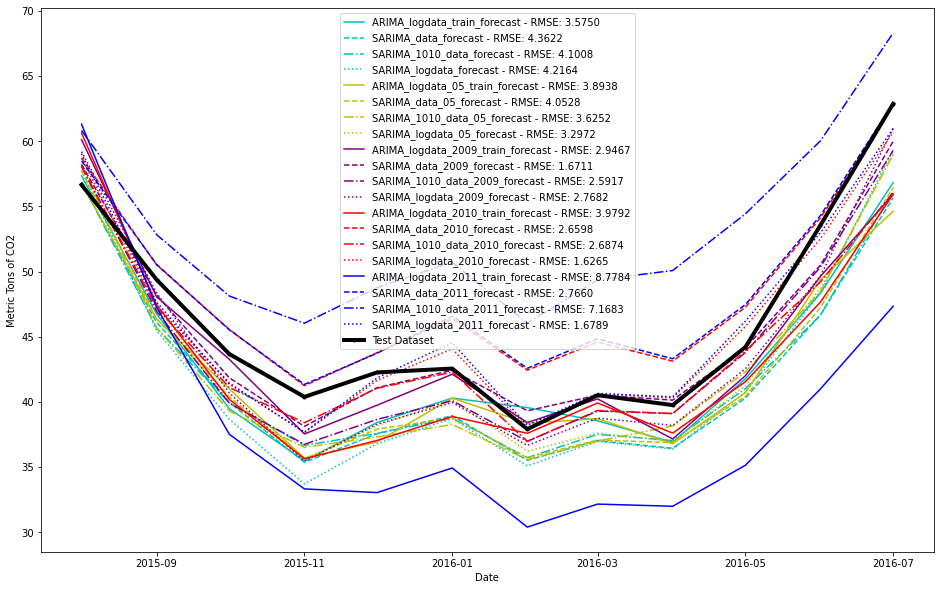

In [96]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")

#Plot 1990 Onward Forecasts
plt.plot(ARIMA_logdata_train_forecast, color = 'c', ls = '-', label = 'ARIMA_logdata_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_forecast, color = 'c', ls = '--', label = 'SARIMA_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_forecast, color = 'c', ls = '-.', label = 'SARIMA_1010_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_forecast, color = 'c', ls = ':', label = 'SARIMA_logdata_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_forecast,data_90_test['Value'], squared=False))

#Plot 2005 Onward Forecasts
plt.plot(ARIMA_logdata_05_train_forecast, color='y', ls = '-', label = 'ARIMA_logdata_05_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_05_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_05_forecast, color='y', ls = '--', label = 'SARIMA_data_05_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_05_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_05_forecast, color='y', ls = '-.', label = 'SARIMA_1010_data_05_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_05_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_05_forecast, color='y', ls = ':', label = 'SARIMA_logdata_05_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_05_forecast,data_90_test['Value'], squared=False))

#Plot 2009 Onward Forecasts
plt.plot(ARIMA_logdata_2009_train_forecast, color='purple', ls = '-', label = 'ARIMA_logdata_2009_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2009_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2009_forecast, color='purple', ls = '--', label = 'SARIMA_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2009_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2009_forecast, color='purple', ls = '-.', label = 'SARIMA_1010_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2009_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2009_forecast, color='purple', ls = ':', label = 'SARIMA_logdata_2009_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2009_forecast,data_90_test['Value'], squared=False))

#Plot 2010 Onward Forecasts
plt.plot(ARIMA_logdata_2010_train_forecast, color='r', ls = '-', label = 'ARIMA_logdata_2010_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2010_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2010_forecast, color='r', ls = '--', label = 'SARIMA_data_2010_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2010_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2010_forecast, color='r', ls = '-.', label = 'SARIMA_1010_data_2010_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2010_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2010_forecast, color='r', ls = ':', label = 'SARIMA_logdata_2010_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2010_forecast,data_90_test['Value'], squared=False))

#Plot 2011 Onward Forecasts
plt.plot(ARIMA_logdata_2011_train_forecast, color='b', ls = '-', label = 'ARIMA_logdata_2011_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2011_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2011_forecast, color='b', ls = '--', label = 'SARIMA_data_2011_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2011_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2011_forecast, color='b', ls = '-.', label = 'SARIMA_1010_data_2011_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2011_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2011_forecast, color='b', ls = ':', label = 'SARIMA_logdata_2011_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2011_forecast,data_90_test['Value'], squared=False))

#Plot acutal test dataset
plt.plot(data_90_test, color='k', marker='.', linewidth=4.0, label = 'Test Dataset')

plt.legend()
plt.show()   

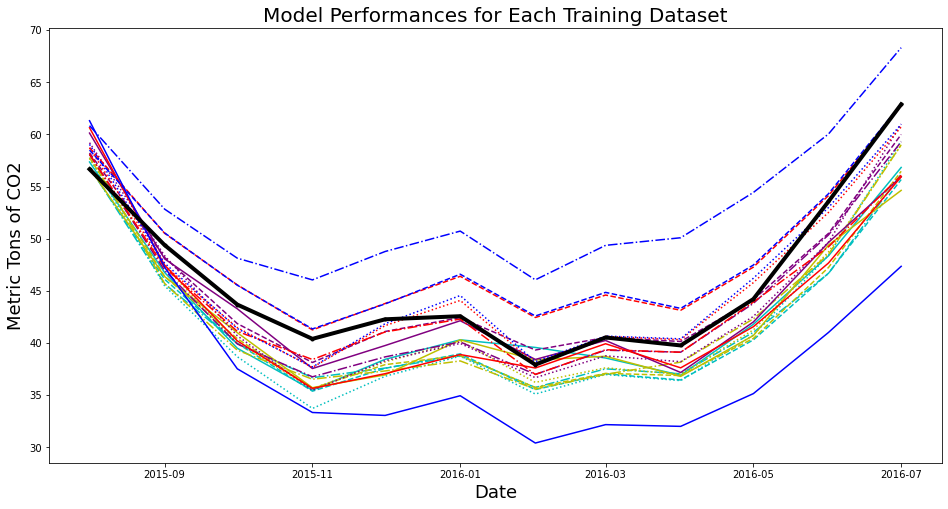

In [97]:
plt.figure(figsize=(16,8))
plt.title("Model Performances for Each Training Dataset", fontsize = 20)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Metric Tons of CO2", fontsize = 18)

#Plot 1990 Onward Forecasts
plt.plot(ARIMA_logdata_train_forecast, color = 'c', ls = '-', label = 'ARIMA_logdata_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_forecast, color = 'c', ls = '--', label = 'SARIMA_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_forecast, color = 'c', ls = '-.', label = 'SARIMA_1010_data_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_forecast, color = 'c', ls = ':', label = 'SARIMA_logdata_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_forecast,data_90_test['Value'], squared=False))

#Plot 2005 Onward Forecasts
plt.plot(ARIMA_logdata_05_train_forecast, color='y', ls = '-', label = 'ARIMA_logdata_05_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_05_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_05_forecast, color='y', ls = '--', label = 'SARIMA_data_05_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_05_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_05_forecast, color='y', ls = '-.', label = 'SARIMA_1010_data_05_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_05_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_05_forecast, color='y', ls = ':', label = 'SARIMA_logdata_05_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_05_forecast,data_90_test['Value'], squared=False))

#Plot 2009 Onward Forecasts
plt.plot(ARIMA_logdata_2009_train_forecast, color='purple', ls = '-', label = 'ARIMA_logdata_2009_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2009_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2009_forecast, color='purple', ls = '--', label = 'SARIMA_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2009_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2009_forecast, color='purple', ls = '-.', label = 'SARIMA_1010_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2009_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2009_forecast, color='purple', ls = ':', label = 'SARIMA_logdata_2009_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2009_forecast,data_90_test['Value'], squared=False))

#Plot 2010 Onward Forecasts
plt.plot(ARIMA_logdata_2010_train_forecast, color='r', ls = '-', label = 'ARIMA_logdata_2010_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2010_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2010_forecast, color='r', ls = '--', label = 'SARIMA_data_2010_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2010_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2010_forecast, color='r', ls = '-.', label = 'SARIMA_1010_data_2010_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2010_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2010_forecast, color='r', ls = ':', label = 'SARIMA_logdata_2010_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2010_forecast,data_90_test['Value'], squared=False))

#Plot 2011 Onward Forecasts
plt.plot(ARIMA_logdata_2011_train_forecast, color='b', ls = '-', label = 'ARIMA_logdata_2011_train_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(ARIMA_logdata_2011_train_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_data_2011_forecast, color='b', ls = '--', label = 'SARIMA_data_2011_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2011_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_1010_data_2011_forecast, color='b', ls = '-.', label = 'SARIMA_1010_data_2011_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_1010_data_2011_forecast,data_90_test['Value'], squared=False))
plt.plot(SARIMA_logdata_2011_forecast, color='b', ls = ':', label = 'SARIMA_logdata_2011_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2011_forecast,data_90_test['Value'], squared=False))

#Plot acutal test dataset
plt.plot(data_90_test, color='k', marker='.', linewidth=4.0, label = 'Test Dataset')

#plt.legend()
plt.show()   

In [98]:
#Create averages of forcasts

#1990 Onward Average
Meanframe_1990 = []
Meanframe_1990 = pd.DataFrame(Meanframe_1990)
Meanframe_1990['Mod1_1990'] = ARIMA_logdata_train_forecast
Meanframe_1990['Mod2_1990'] = SARIMA_data_forecast
Meanframe_1990['Mod3_1990'] = SARIMA_1010_data_forecast
Meanframe_1990['Mod4_1990'] = SARIMA_logdata_forecast
Meanframe_1990['Mean_1990'] = Meanframe_1990.mean(axis=1)

#2005 Onward Average
Meanframe_2005 = []
Meanframe_2005 = pd.DataFrame(Meanframe_2005)
Meanframe_2005.empty
Meanframe_2005['Mod1_2005'] = ARIMA_logdata_05_train_forecast
Meanframe_2005['Mod2_2005'] = SARIMA_data_05_forecast
Meanframe_2005['Mod3_2005'] = SARIMA_1010_data_05_forecast
Meanframe_2005['Mod4_2005'] = SARIMA_logdata_05_forecast
Meanframe_2005['Mean_2005'] = Meanframe_2005.mean(axis=1)

#2009 Onward Average
Meanframe_2009 = []
Meanframe_2009 = ARIMA_logdata_2009_train_forecast
Meanframe_2009 = pd.DataFrame(Meanframe_2009)
Meanframe_2009.columns = ['Mod1_2009']
Meanframe_2009['Mod2_2009'] = SARIMA_data_2009_forecast
Meanframe_2009['Mod3_2009'] = SARIMA_1010_data_2009_forecast
Meanframe_2009['Mod4_2009'] = SARIMA_logdata_2009_forecast
Meanframe_2009['Mean_2009'] = Meanframe_2009.mean(axis=1)

#2010 Onward Average
Meanframe_2010 = []
Meanframe_2010 = ARIMA_logdata_2010_train_forecast
Meanframe_2010 = pd.DataFrame(Meanframe_2010)
Meanframe_2010.columns = ['Mod1_2010']
Meanframe_2010['Mod2_2010'] = SARIMA_data_2010_forecast
Meanframe_2010['Mod3_2010'] = SARIMA_1010_data_2010_forecast
Meanframe_2010['Mod4_2010'] = SARIMA_logdata_2010_forecast
Meanframe_2010['Mean_2010'] = Meanframe_2010.mean(axis=1)

#2011 Onward Average
Meanframe_2011 = []
Meanframe_2011 = ARIMA_logdata_2011_train_forecast
Meanframe_2011 = pd.DataFrame(Meanframe_2011)
Meanframe_2011.columns = ['Mod1_2011']
Meanframe_2011['Mod2_2011'] = SARIMA_data_2011_forecast
Meanframe_2011['Mod3_2011'] = SARIMA_1010_data_2011_forecast
Meanframe_2011['Mod4_2011'] = SARIMA_logdata_2011_forecast
Meanframe_2011['Mean_2011'] = Meanframe_2011.mean(axis=1)

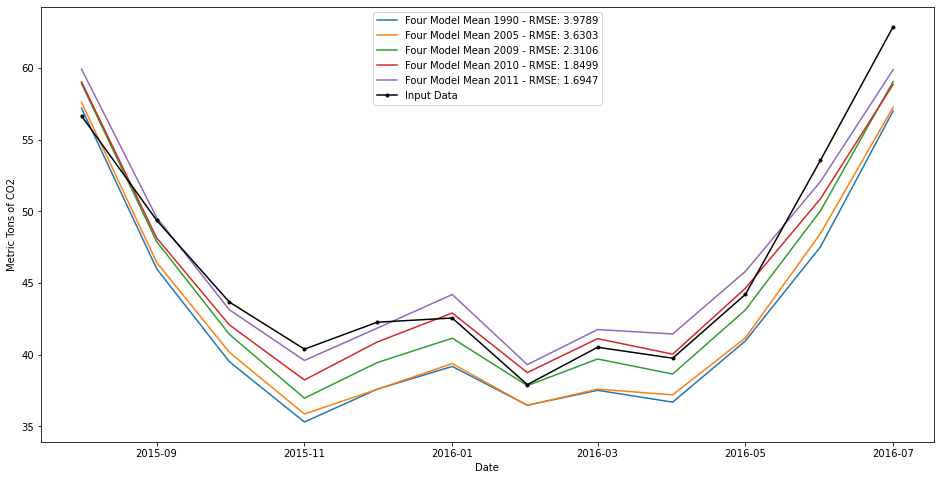

In [99]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")

plt.plot(Meanframe_1990['Mean_1990'], label = 'Four Model Mean 1990' + 
                        ' - RMSE: %.4f'% mean_squared_error(Meanframe_1990['Mean_1990'],data_90_test['Value'], squared=False))
plt.plot(Meanframe_2005['Mean_2005'], label = 'Four Model Mean 2005' + 
                        ' - RMSE: %.4f'% mean_squared_error(Meanframe_2005['Mean_2005'],data_90_test['Value'], squared=False))
plt.plot(Meanframe_2009['Mean_2009'], label = 'Four Model Mean 2009' + 
                        ' - RMSE: %.4f'% mean_squared_error(Meanframe_2009['Mean_2009'],data_90_test['Value'], squared=False))
plt.plot(Meanframe_2010['Mean_2010'], label = 'Four Model Mean 2010' + 
                        ' - RMSE: %.4f'% mean_squared_error(Meanframe_2010['Mean_2010'],data_90_test['Value'], squared=False))
plt.plot(Meanframe_2011['Mean_2011'], label = 'Four Model Mean 2011' + 
                        ' - RMSE: %.4f'% mean_squared_error(Meanframe_2011['Mean_2011'],data_90_test['Value'], squared=False))
plt.plot(data_90_test, color='k', marker='.', label = 'Input Data')

plt.legend()
plt.show()  

# Observations

From the plot of all 20 models and RMSE data (before averages were taken, top of Section 6.7), the top models are:

1. SARIMA_logdata_2010_forecast RMSE 1.6265
2. SARIMA_data_2009_forecast RMSE 1.6711
3. SARIMA_logdata_2011_forecast RMSE 1.6789

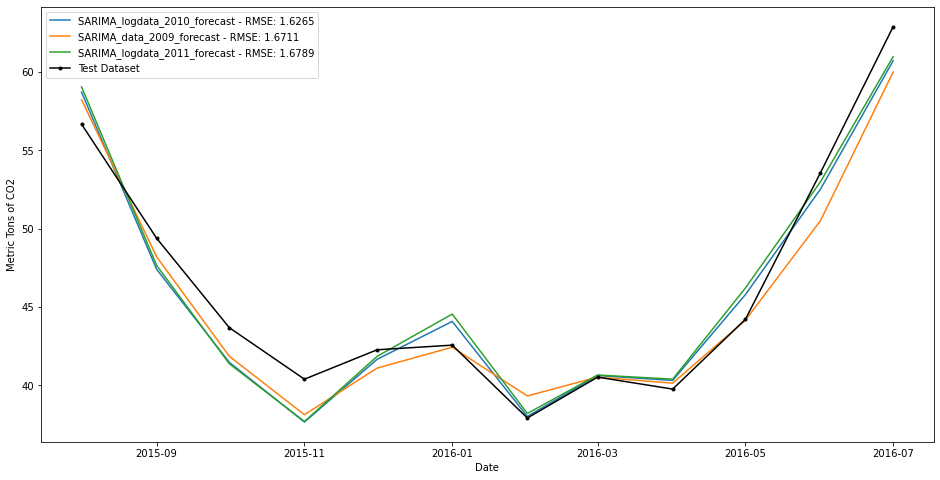

In [100]:
#Plot the three best models with RMSE below 2
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")

# Best Model:
plt.plot(SARIMA_logdata_2010_forecast, label = 'SARIMA_logdata_2010_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2010_forecast,data_90_test['Value'], squared=False))
# Second Best Model:
plt.plot(SARIMA_data_2009_forecast, label = 'SARIMA_data_2009_forecast'+ 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_data_2009_forecast,data_90_test['Value'], squared=False))
# Third Best Model:
plt.plot(SARIMA_logdata_2011_forecast, label = 'SARIMA_logdata_2011_forecast' + 
                        ' - RMSE: %.4f'% mean_squared_error(SARIMA_logdata_2011_forecast,data_90_test['Value'], squared=False))
#Plot acutal test dataset
plt.plot(data_90_test, color='k', marker='.', label = 'Test Dataset')

plt.legend()
plt.show()   

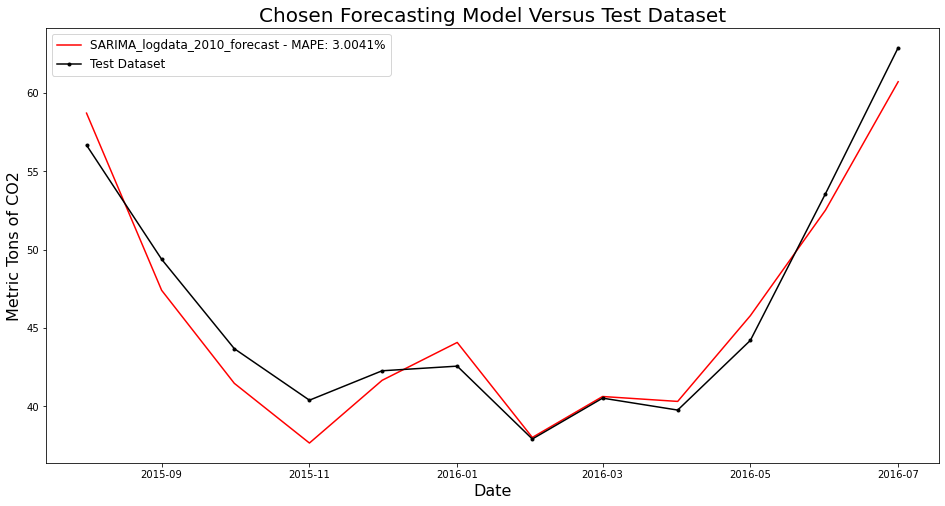

In [101]:
#Plot the three best models with RMSE below 2
plt.figure(figsize=(16,8))
plt.xlabel("Date", fontsize=16)
plt.ylabel("Metric Tons of CO2", fontsize=16)

# Best Model:
plt.plot(SARIMA_logdata_2010_forecast, color = 'r', label = 'SARIMA_logdata_2010_forecast' + 
                        ' - MAPE: %.4f'% (100*mean_absolute_percentage_error(SARIMA_logdata_2010_forecast,data_90_test['Value']))+'%')
#Plot acutal test dataset
plt.plot(data_90_test, color='k', marker='.', label = 'Test Dataset')
plt.title('Chosen Forecasting Model Versus Test Dataset', fontsize=20)


plt.legend(fontsize=12)
plt.show()   

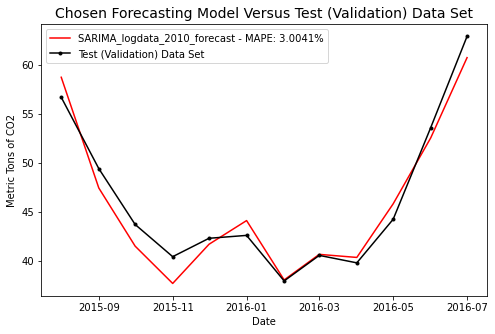

In [131]:
#PltoFormatted for PORTFOLIO

#Plot the three best models with RMSE below 2
plt.figure(figsize=(8,5)).patch.set_facecolor('white')
plt.xlabel("Date", fontsize=10)
plt.ylabel("Metric Tons of CO2", fontsize=10)

# Best Model:
plt.plot(SARIMA_logdata_2010_forecast, color = 'r', label = 'SARIMA_logdata_2010_forecast' + 
                        ' - MAPE: %.4f'% (100*mean_absolute_percentage_error(SARIMA_logdata_2010_forecast,data_90_test['Value']))+'%')
#Plot acutal test dataset
plt.plot(data_90_test, color='k', marker='.', label = 'Test (Validation) Data Set')
plt.title('Chosen Forecasting Model Versus Test (Validation) Data Set', fontsize=14)

plt.legend(fontsize=10)
plt.show()   

# 7 - Carbon Emissions Forecasting:  2016-08 to 2017-07

## Best Model SARIMA_logdata_67 Month Fit, Forecast (2011)

In [103]:
# Best Model SARIMA_logdata_67 Month Fit, Forecast (2011)
data_2011_frcstfit = data[data.index > "2010-12-01"]
#Create a log transformation dataset for models which use log trasnforms
logdata_2011_frcstfit = np.log(data_2011_frcstfit)

#Second best Model SARIMA_data_79 Month Fit, Forecast (2011)
data_2010_frcstfit = data[data.index > "2009-12-01"]

# Third Best Model SARIMA_logdata_55 Month Fit, Forecast (2012)
data_2012_frcstfit = data[data.index > "2011-12-01"]
#Create a log transformation dataset for models which use log trasnforms
logdata_2012_frcstfit = np.log(data_2012_frcstfit)

In [104]:
# Best Model
SARIMA_logdata_2011_frcstfit = ARIMA(logdata_2011_frcstfit, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_2011_frcstfit_fit = SARIMA_logdata_2011_frcstfit.fit() #Fit the model
SARIMA_logdata_2011_frcstfit_fitted = SARIMA_logdata_2011_frcstfit_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_2011_frcstfit_pred = np.exp(SARIMA_logdata_2011_frcstfit_fitted) #Exp to remove logarithm
#mean_squared_error(SARIMA_logdata_2011_frcstfit_pred,data_2011_frcstfit['Value'], squared=False) #Calculate RMSE

In [105]:
# Second Best Model
SARIMA_data_2010_frcstfit = ARIMA(data_2010_frcstfit, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) #Run the model
SARIMA_data_2010_frcstfit_fit = SARIMA_data_2010_frcstfit.fit() #Fit the model
SARIMA_data_2010_frcstfit_pred = SARIMA_data_2010_frcstfit_fit.fittedvalues #Obtain fitted values
#mean_squared_error(SARIMA_data_2010_frcstfit_pred,data_2010_frcstfit['Value'], squared=False) #Calculate RMSE

In [106]:
# Third Best Model
SARIMA_logdata_2012_frcstfit = ARIMA(logdata_2012_frcstfit, order=(3, 1, 4), seasonal_order=(0, 1, 1, 12)) #Run the SARIMA model
SARIMA_logdata_2012_frcstfit_fit = SARIMA_logdata_2012_frcstfit.fit() #Fit the model
SARIMA_logdata_2012_frcstfit_fitted = SARIMA_logdata_2012_frcstfit_fit.fittedvalues #Obtain fitted values
SARIMA_logdata_2012_frcstfit_pred = np.exp(SARIMA_logdata_2012_frcstfit_fitted) #Exp to remove logarithm
#mean_squared_error(SARIMA_logdata_2012_frcstfit_pred,data_2012_frcstfit['Value'], squared=False) #Calculate RMSE

In [107]:
# Best Model - Forecast
SARIMA_logdata_2011_frcstfit_log = SARIMA_logdata_2011_frcstfit_fit.forecast(steps = 12)
SARIMA_logdata_2011_frcstfit_forecast = np.exp(SARIMA_logdata_2011_frcstfit_log)


# Second Best Model - Forecast
SARIMA_data_2010_frcstfit_forecast = SARIMA_data_2010_frcstfit_fit.forecast(steps=12)

# Third Best Model - Forecast
SARIMA_logdata_2012_frcstfit_log = SARIMA_logdata_2012_frcstfit_fit.forecast(steps = 12)
SARIMA_logdata_2012_frcstfit_forecast = np.exp(SARIMA_logdata_2012_frcstfit_log)

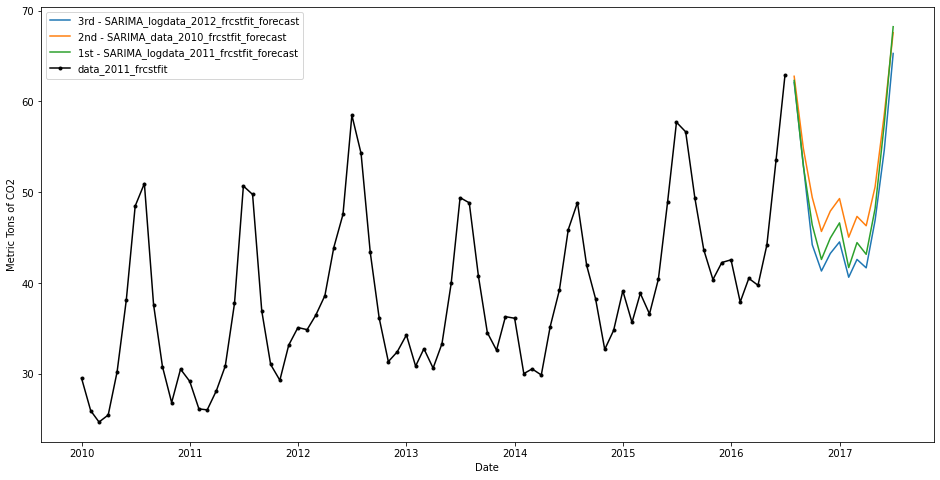

In [108]:
plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Metric Tons of CO2")

plt.plot(SARIMA_logdata_2012_frcstfit_forecast, label = '3rd - SARIMA_logdata_2012_frcstfit_forecast')

plt.plot(SARIMA_data_2010_frcstfit_forecast, label = '2nd - SARIMA_data_2010_frcstfit_forecast')

plt.plot(SARIMA_logdata_2011_frcstfit_forecast, label = '1st - SARIMA_logdata_2011_frcstfit_forecast')

plt.plot(data_2010_frcstfit, color='k', marker='.', label = 'data_2011_frcstfit')

plt.legend()
plt.show()  

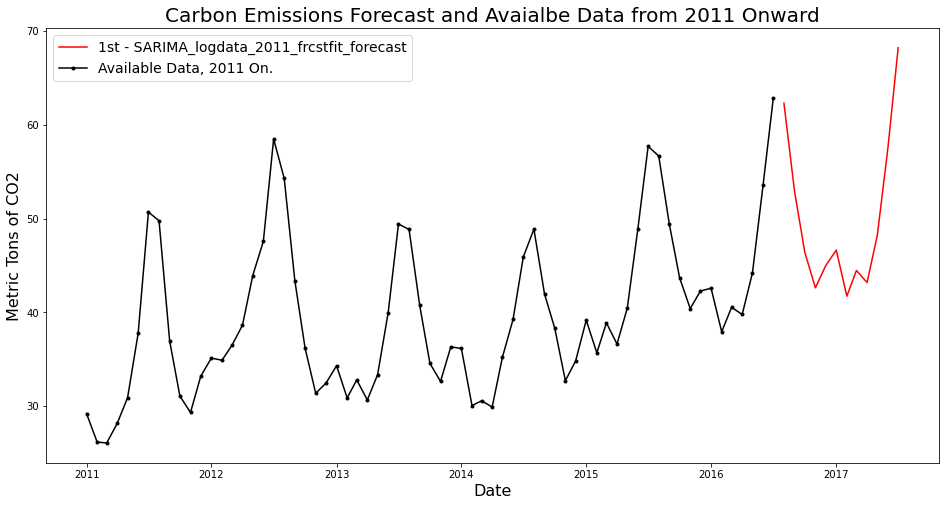

In [109]:
plt.figure(figsize=(16,8))
plt.xlabel("Date", fontsize=16)
plt.ylabel("Metric Tons of CO2", fontsize=16)

plt.plot(SARIMA_logdata_2011_frcstfit_forecast, color = 'r', label = '1st - SARIMA_logdata_2011_frcstfit_forecast')

plt.plot(data_2011_frcstfit, color='k', marker='.', label = 'Available Data, 2011 On.')
plt.title('Carbon Emissions Forecast and Avaialbe Data from 2011 Onward', fontsize=20)


plt.legend(fontsize=14)
plt.show() 

The data are forecasted above following trend and seasonality characteristics.

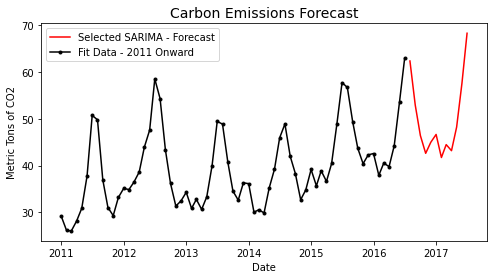

In [170]:
#JUST FOR THE PORTFOLIO
plt.figure(figsize=(8,4)).patch.set_facecolor("white")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Metric Tons of CO2", fontsize=10)

plt.plot(SARIMA_logdata_2011_frcstfit_forecast, color = 'r', label = 'Selected SARIMA - Forecast')

plt.plot(data_2011_frcstfit, color='k', marker='.', label = 'Fit Data - 2011 Onward')
plt.title('Carbon Emissions Forecast', fontsize=14)


plt.legend(fontsize=10)
plt.show() 